<a href="https://colab.research.google.com/github/lchutny/W207_ALSY_FinalProject/blob/master/W207_ALSY_FinalProject_Baseline_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FACIAL KEYPOINT DETECTION and PREDICTION USING NEURAL NETS   

## Final Project W207  | Dr. Yacov Solomon | Monday 18:30 Pacific

### Andrew Webb, Laura Chutny, Suzy Choi, and Yue Hu
### 5 August 2019



---



## NOTE  TO YACOV: In order to collaborate on this project, we have been running this in Google colab with hosted runtime. We have exported this as an ipynb, but have not had time to run the file on a desktop machine, as most of us do not have a GPU capable of this and it takes a very long time to run some of the NN models. If you have trouble running the file, please let us know - and we can give you access to the colab file.

Regards, Andrew, Laura, Suzy and Yue

# I. Introduction

Facial recognition has a variety of applications, notably in biometrics. Rather than sign into a phone or laptop, give a username and password for a service, or use some form of document identification, people can use their faces to identify themselves. Similarly, security and police forces can use this type of recognition to match images and identify people in the course of investigations, enabling faster and more accurate identifications. There are other uses including medical diagnostics and analysis of facial expressions that this type of work can also be used for.

As with fingerprints, no two faces are exactly alike, so this is actually a more robust form of identification than usernames, passwords, documents, etc. that can either be forged or stolen. In order to properly leverage facial recognition for identification, however, the key facial features must be detected with a high level of accuracy. Detecting key facial features given images of faces in a variety of contexts is a key aspect of leveraging facial recognition for personal identification. If we can accurately detect the facial keypoints of a given image in a variety of contexts, we can then ensure accurate identification of the person associated with the face. Additionally, this type of model can even identify if the image is not of a human face.

For this project, we will use a variety of Supervised Machine Learning techniques (KNN, Linear Regression, Neural Networks) to detect the facial keypoints, and make identifications. 

Following standard machine learning problem methodology, this paper will follow these steps:  

1.   Inputs, $X$ . In this problem, the inputs are provided by Kaggle, in the Facial Keypoints Detection competition ([https://www.kaggle.com/c/facial-keypoints-detection]). The $X$ inputs consist of vectors of pixels representing images of faces in 96x96 pixel grids.  Details are discussed more in [Section II](https://colab.research.google.com/drive/1lQbest_yYl_irX_aiY574ksZ1a4SyufO#scrollTo=9SYvZA_TX3Dd)

 Inputs, $y$ . Accompanying the training images are labels, some fully and some partially labeled. The labels are the x,y coordinates in the image space for the locations of (up to) 15 facial keypoints.  The labels are continuous values - x,y coordinate pairs - a 15 x 2 array of x,y values for 15 facial keypoints that has been flattened to 1 x 30.

2.   Outputs: From the training data, we will train a model, with the eventual goal to (correctly) predict the location of the facial keypoints ($\hat y$) for an unlabeled image.  

3.  Feature Engineering (Data) and Feature Selection: In [Section III](https://colab.research.google.com/drive/1lQbest_yYl_irX_aiY574ksZ1a4SyufO#scrollTo=1nqq3gpbnYox) the extraction, cleaning and preparation of the data is discussed.  As we are given labels for the training data, this is treated as a supervised learning problem.  

 Feature selection for simpler models is not performed, as the entire image is required to perform the analysis on. This means that given the large number of features (96 x 96 = 9216 pixels) versus the small number of labels (15) the simpler models will likely suffer from the Curse of Dimensionality. However, feature selection is essentially 'automatically' carried out when using Neural Nets for analysis of images, thus no separate feature selection will be performed as part of this project.
 
 Data will be split into Training and Dev sets for the initial model parameter selection and optimization.

4.  Modeling:  In this report, we will compare and contrast the model types discussed in W207. Three types of supervised learning models will be used:  
 * KNN ([Section IV](https://colab.research.google.com/drive/1lQbest_yYl_irX_aiY574ksZ1a4SyufO#))  
 * Linear Regression ([Section V](https://colab.research.google.com/drive/1lQbest_yYl_irX_aiY574ksZ1a4SyufO#scrollTo=AMU0QdgtCs-C)) and   
 * Neural Networks ([Section VI](https://colab.research.google.com/drive/1lQbest_yYl_irX_aiY574ksZ1a4SyufO#scrollTo=pcT1qVjhCipV)).  

 These models will be fit using the training data, then using the model specific cost function, the parameters will be optimized to achieve the objective (maximize or minimize cost) as described in detail in the section(s) for each model.
 
 Finally, in the 'Test' step  the Dev data will be used to evaluate the hyperparameters (if present) and allow for comparison of the accuracy of each of the models.
 
This report will end with conclusions regarding the effectiveness of each type of model along with suggestions for further improvements.

Assumptions: All faces are human and have detectable keypoints

To start, we will import all of the needed modules for this project and show the versions for each of the major project components (python, pandas, numpy, etc.).   Required setup is:  
python version = 3.6.8  
Pandas Version =  0.24.2  
Numpy Version =  1.16.4  
Scikit Learn Version =  0.21.3  
Theano Version =  1.0.4
Tensorflow Version = 1.14.0

In [50]:
# Import all of the needed modules
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import time
import sys
import csv
import os

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# Theano imports
import theano 
from theano import tensor as T
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
print(theano.config.device) # We're using CPUs (for now)
print(theano.config.floatX) # Should be 64 bit for CPUs
np.random.seed(0) # Setting random seed

# Tensorflow
import tensorflow as tf


cpu
float64


In [51]:
# show the versions for each of the main dependencies
print("python version =",sys.version)
print("Pandas Version = ",pd.__version__)
print("Numpy Version = ",np.__version__)
print("Scikit Learn Version = ", sklearn.__version__)
print("Theano Version = ", theano.__version__)
print("Tensorflow Version =", tf.__version__)

python version = 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
Pandas Version =  0.24.2
Numpy Version =  1.16.4
Scikit Learn Version =  0.21.3
Theano Version =  1.0.4
Tensorflow Version = 1.14.0


In [3]:
# Run this cell to mount your Google Drive - if that is where you want to access your data from
from google.colab import drive
drive.mount('/content/drive')
# Make sure to upload from your local machine and then this path will work

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


<a id='Section_2'></a>
# II. The image data 

The input data, $X$, is a collection of 96x96 pixel images of a face, provided as a flattened 1 x 9216 vector of pixels, with gray scale values ranging from 0-255. The corresponding 'labels' are the seperate x and y coordinates within the image of up to 15 keypoints: centers, inner corners and outer corners of left and right eye (6 x,y labels), inner and outer ends of both eyebrows (4 labels), nose tip (1 label), left and right corners of the mouth (2 labels) and centers of top and bottoms lips (2 labels). Note that here, left and right refer to the point of view of the subject.


Training data is provided from Kaggle as a CSV file of 7049 images, both fully and partially labelled. Test data is a similar file of 1783 images only. Issues present in the training data include:   
- Images that are not of people
- Images that are not centered in the frame
- Images that show only 1 side of a person
- Images with variable lighting
- Images that only have partial labels  

Partial labels belong to two categories:  
 1.   *Missing* feature labels - that is, the face is centered but things like left_eyebrow_inner_end are simply not labeled
 2.   *Not Available* labels - that is, the face of the person in the image is facing down, left, right, up, etc. and the feature does not *show* in the photo, therefore cannot be labeled. (i.e. if a person is facing left, some of their left features will not be available)

Some of these issues will be addressed further on in the model sections.  

To view the data, either training or test, we have built a function which transforms the CSV text data into an array format that we can work with. Additionally, as the issue of missing labels seems more prevalent than the unavailable labels, we have added an option to load data that only has complete labels. We can then train a model on the complete data and perhaps use it to "fill-in" missing labels at a later stage.

The below model can be used to load complete or incomplete training/dev data or test data.


In [0]:
# Function to load and tidy up the data

# Update with filepath. Just uncomment the code to get your filepath to work
# Andrew's filepath
#filepath = '/content/drive/My Drive/FinalProject_w207/'
# Suzy's filepath
#filepath = '/content/drive/My Drive/FinalProject_w207/'
# Yue's filepath
#filepath = ''
# Laura's filepath
filepath = '/content/'


def load_data(data_type='train', columns=None, filepath=filepath, data='complete'):
  """Load the data from Kaggle which is contained on your local drive
  A filepath string variable gives the path to the csv data
  
  If data_type = 'train', then load the train data
  If data_type = 'dev', then load the dev data
  If data_type = 'test', then load the test data.
  
  If data = 'complete', then only images with complete labels are returned
  If data = 'incomplete', then only images containing any NaN label values are returned
  If data = any other value, then all images are returned
  
  You can also pass in a list of columns if you only want a subset of labels
  """
  
  # create a DataFrame object with the training.csv data
  # shuffle records in the csv file
  df = shuffle(pd.DataFrame(pd.read_csv(filepath + 'training.csv')),
              random_state = 42) # set a seed for development
  
  # Use the first 6000 records for training
  train_data = df[:6000]
  
  # And the rest for dev
  dev_data = df[6000:]
  
  # Test data
  test_data = pd.DataFrame(pd.read_csv(filepath + 'test.csv'))
  
  if data_type == 'train':
    df = train_data
    
  elif data_type == 'dev':
    df = dev_data
    
  elif data_type == 'test':
    df = test_data
    
  else:
    print('Something went wrong with the train/dev/test data assignment')
    
  # train and dev data will have labels (facial keypoints) as well as an associated image
  # test data only has the image column
  # the image column is a string field delimited by spaces
  # we will split the image column and turn it into a numpy array
  
  # Assign the X variable to the image
  df['Image'] = df['Image'].apply(lambda image: np.fromstring(image, sep=' '))
  
  # if the columns were passed in to the function
  if columns:  
    df = df[list(columns) + ['Image']]
  
  # prints the number of values for each column
  # uncomment to see labels associated with number of images in the dataset
  # print("Number of Values Each Column =\n",df.count())  

  # drop all rows that have missing values in them if data == 'complete'
  # this will ONLY output images that have no unavailable labels 
  # (i.e. no images with faces turned left/right/up/down and no missing values)
  if data == 'complete':
    df = df.dropna() 
    print("Number of rows total after dropping missing valued data =",df.shape[0])
    
  # include only images that have missing or unavailable labels
  # this can be used to help "fill-in" missing values to increase the training set
  elif data == 'incomplete':
    df = df[df.isnull().any(1)]
    print("Number of rows total after dropping completely labeled data =",df.shape[0])
    
  # include all rows of the data
  else:
    print("Number of rows having no data dropped =", df.shape[0])
  
  # scale pixel values to [0, 1]
  X = np.vstack(df['Image'].values) / 255.  
  X = X.astype(np.float32)
  
  # Assign y variable to labels, if applicable (i.e. if we are not using test data)
  if data_type == 'test':
    y = None
  else:
    # set y to equal all but the last column (only the labels, not the image)
    y = df[df.columns[:-1]].values
    # scale target coordinates to [-1, 1] - i.e. center of the image is x=y=0
    y = (y - 48) / 48
    y = y.astype(np.float32)
    
    # Add label_names here for easy output in the project
    label_names = df.columns[:-1].astype(np.str)
    
  return X, y, label_names
  
      

First we will assign variables for the complete training data set

In [5]:
# get train data into X and y and print number of values in each column
train_X, train_y, train_labels = load_data(data_type = 'train', data='complete')
print("Training X shape:",train_X.shape,"Training y shape",train_y.shape)

Number of rows total after dropping missing valued data = 1842
Training X shape: (1842, 9216) Training y shape (1842, 30)


Then we can load the complete dev data

In [6]:
# get dev data into X and y splits and print the same values
dev_X, dev_y, dev_labels = load_data(data_type = 'dev', data='complete')
print("Dev X shape:",dev_X.shape,"Dev y shape",dev_y.shape)

Number of rows total after dropping missing valued data = 298
Dev X shape: (298, 9216) Dev y shape (298, 30)


### Viewing the training data arrays and rendering as images

In order to better understand the data we are using, we will look at an individual array from our complete training data. Here we see that each array has 9216 values, each representing the pixel values for that image. For each value, 0 would be a completely black pixel, 1 would be a completely white pixel, and 0.5 would be an even grey mix of black and white.

In [7]:
# Print a sample of the train data
print(train_X[0])
print(train_X[0].shape)

[0.04705882 0.04705882 0.04313726 ... 0.27058825 0.25490198 0.23529412]
(9216,)


The below shoes the array rendered as a 96x96 pixel image

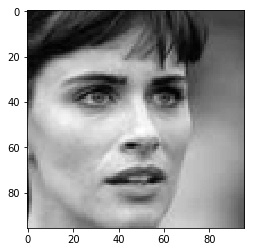

In [8]:
# Print a sample X image from the above data (0 is black, 1 is white)
img = train_X[0].reshape(96,96)
plt.imshow(img, cmap='gray') 

The labels, too, are represented as an array which can be overlaid on top of the image. Given an image, our goal is to predict the labels (x and y coordinates) associated with the facial key points. This is a supervised learning problem where given an image, $X$, we would like to predict the 15 specific facial keypoint locations, $\hat{Y}$

In [9]:
# Print a sample of y label data. x,y = 0,0 is the center of the image.
keypoints_1 = train_y[0:1,:]
print(keypoints_1)
print(keypoints_1.shape, type(keypoints_1))

[[ 0.261807   -0.20208012 -0.34046057 -0.20353137  0.13390376 -0.17920847
   0.39397693 -0.18342675 -0.22617969 -0.16135813 -0.5313947  -0.15987785
   0.11421517 -0.31416225  0.4764021  -0.3693298  -0.10285714 -0.34354496
  -0.6637912  -0.31978694  0.1138322   0.21350466  0.2699293   0.55108494
  -0.2746109   0.5821255   0.04251724  0.51590264  0.02736945  0.60252357]]
(1, 30) <class 'numpy.ndarray'>


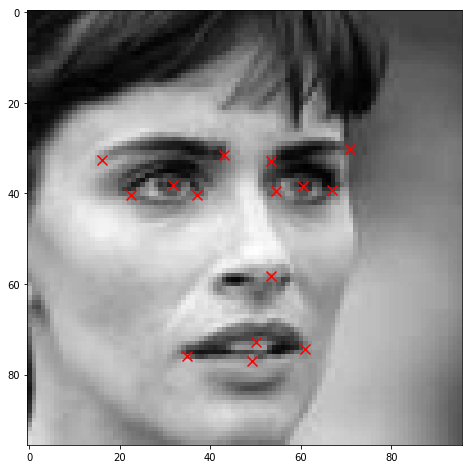

In [10]:
# print the sample image with the training 'labels' - keypoint indices marked on image.
# process y data into 2 columns - first is x and second is y for plotting points
keypoints_2 = keypoints_1.reshape(15,2)

# we normalized the keypoint locations, but to plot we need to 'un-normalize'
keypoints_3 = keypoints_2*48 + 48

# Plot
plt.figure(figsize=(8,8))
plt.imshow(img,cmap='gray')
plt.scatter(keypoints_3[:,0],keypoints_3[:,1],c='r',marker="x", s=100)
plt.show()

### Variability in Training Data - Example
Looking at the variability in training data, an example is how the nose position varies - shown on a single image for illustrative purposes, we can see that the variation in location is large.

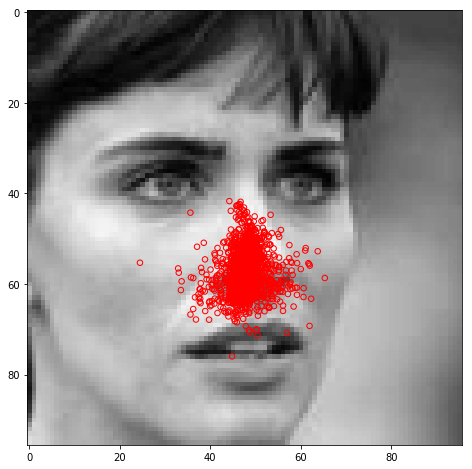

In [44]:
# Look at variability in training data using nose tip - element 10 (x is feature 20 and y is feature 21 in the train_y matrix- indexed from 0)
# define nose data:
nose = train_y[:,20:22]*48+48
plt.figure(figsize=(8,8))
plt.imshow(img,cmap='gray')
plt.scatter(nose[:,0],nose[:,1],edgecolors='r',marker="o",facecolors='none', s=30)
plt.show()

# III. Data Preparation / Feature Engineering

In order to prepare the data for our modeling, we will experiment with a few methods of transforming the image data. (Feature Engineering)

a) Blurring the pixels  
b) Accentuating the images  
c) Flipping (Reversing) the images and labels

## a) and b) Blur and accentuate images for better feature classification

One of the things we would like to address is the complex feature space involved in taking images and classifing the facial keypoints. We have 30 labels we would like to predict given the image data (x and y coordinates for 15 facial keypoints) and we are using arrays with 9216 features to train our models. The variability in each of these features can be reduced by blurring the images (i.e. transforming each pixel value to be the weighted average of the surrounding pixel values) and accentuating the light and dark aspects of the image.

In [0]:
def Gaussian_blur(image):
  """Blur each image by Gaussian blur with simplified 9 pixel Gaussian kernel"""
  # create kernel
  kernel = np.array([[1,2,1], [2,4,2], [1,2,1]])
  # create weights by dividing the kernel by the sum of the kernel
  kernel = kernel / np.sum(kernel)

  image = image.reshape(96,96)
  # create a numpy array with values of 0 on the border of matrix 
  # and others are one
  border_image = np.ones(image.shape)
  border_image[1:-1,1:-1] = 0
  # initialize the blurred image matrix
  image_blur = np.zeros(image.shape)

  # smoothed value of a pixel by a weighted combination of the 
  # original value and the 8 neighboring values
  for i in list(range(1,95,1)):
      for j in list(range(1,95,1)):
          image_blur[i][j] = (image[i-1][j-1]*kernel[0][0]) + (image[i-1][j]*kernel[0][1]) + (image[i-1][j+1]*kernel[0][2])
          + (image[i][j-1]*kernel[1][0]) + (image[i][j]*kernel[1][1]) + (image[i][j+1]*kernel[1][2])
          + (image[i+1][j-1]*kernel[2][0]) + (image[i+1][j]*kernel[2][1]) + (image[i+1][j+1]*kernel[2][2])

  # Keep value on the border of image matrix and update other value by a
  # weighted combination of the original value and the 8 neighboring values        
  return (image_blur).reshape(9216,)
  
def Blur_image(data):
  """Blur all images in data with Gaussian Blur"""
  blur_image1 = np.empty(data.shape)
  for k in range(data.shape[0]):
    blur_image1[k,:] = Gaussian_blur(data[k,:])
  return blur_image1

In [0]:
def accentuate_image(img_arr):
  '''
  Function to bring out the main light and dark features of the image
  with the aim of helping the models identify the objects to be labeled
  '''
  # take the very dark pixels and make them fully black
  img = np.around(img_arr, 2)
  img = np.where(img <= 0.3, 0, img)
  
  # make the non-dark pixels a little whiter
  img = np.where((img > 0.3) & (img <= 0.9), 
                      img + 0.1, img)
  return img

To show what each of these functions does to transform the original data, we will plot sample images

In [0]:
def plot_sample(img_arr, img_labels = np.nan, pred_labels = np.nan):
  
  # Set Figure specs
  fig = plt.figure(figsize=(12, 12))
  fig.subplots_adjust(
  left=0, right=1, bottom=0, top=0.95, hspace=0.05, wspace=0.05)

  # limit number of samples to plot to 8
  if len(img_arr) > 8:
    sample_count = 8
  else:
    sample_count = len(img_arr)

  # plot each image
  for i in range(sample_count):
    # Plot the image
    axis = fig.add_subplot(4, 4, i + 1, xticks = [], yticks = [])
    img = img_arr[i].reshape(96, 96)
    axis.imshow(img, cmap='gray')
    
    # Plot the labels onto the image
    if np.all(np.isfinite(img_labels)):
      axis.scatter(img_labels[i][0::2] * 48 + 48, img_labels[i][1::2] * 48 + 48, 
                   marker='o', s=30, c='red', label = 'y actual')
    if np.all(np.isfinite(pred_labels)):
      axis.scatter(pred_labels[i][0::2] * 48 + 48, pred_labels[i][1::2] * 48 + 48, 
                   marker='x', s=30, c='blue', label = 'y predicted')


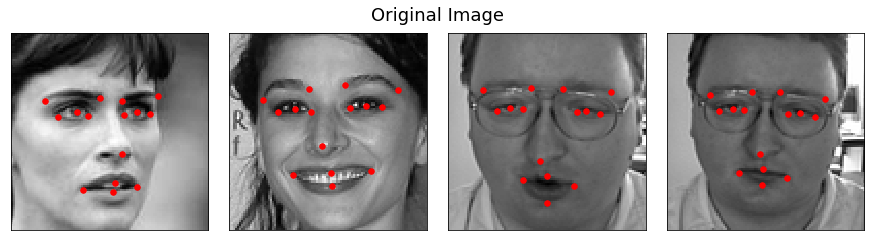

In [14]:
# Plotting original Samples
plot_sample(train_X[0:4], train_y[0:4])
plt.suptitle('Original Image', fontsize=18)
plt.show()

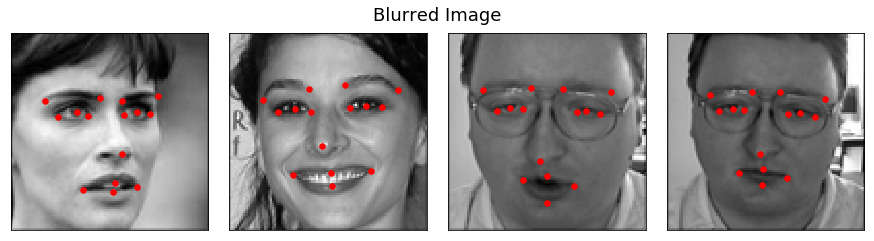

In [74]:
# Plotting Blurred images
# Blur first
blur_img = Blur_image(train_X[0:4])

# Plot samples
plot_sample(blur_img, train_y[0:4])
plt.suptitle('Blurred Image', fontsize=18)
plt.show()

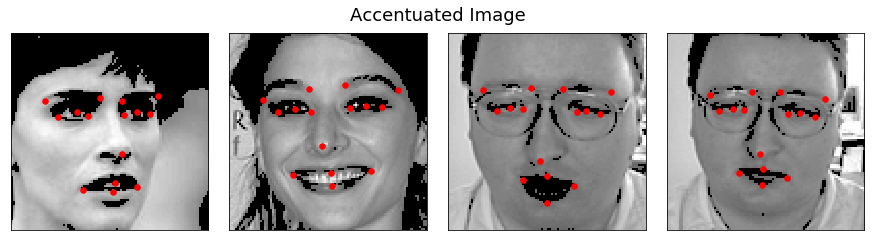

In [17]:
# Plotting Accentuated Images
# Accentuate images first
acc_img = accentuate_image(train_X[0:4])

# Plot Samples
plot_sample(acc_img[0:4], train_y[0:4])
plt.suptitle('Accentuated Image', fontsize=18)
plt.show()

## c) Flipping images and labels for extra training data

We note that if we only rely on images with 'complete' labels, we are not making use of most of the data  - there are only 1842 images in our training set that have all of the labels marked. In order to increase our training data, we will use a form of bootstrapping - we can double the amount of 'complete' training data (or really any part of our data) by using a reverse index on the image array data to flip the image. We can then apply a transformation on the x-coordinates of the feature labels to ensure that our flipped label coordinates match the flipped image data (note that the y-coordinates do not need to be adjusted).

In [0]:
# create a function to flip images and labels

def flip_image(img_array, img_labels):
  flipped_images = np.empty(img_array.shape)
  for i in range(len(img_array)):
    img_array1 = img_array.copy()
    
    # reshape the array to 96x96 shape, flip the row values, 
    # then reshape back to the original 1x9216 shape
    arr = img_array1[i].reshape(96,96)[:,::-1].reshape(1, 9216)
    
    # add the flipped array to flipped images
    flipped_images[i] = arr
  
  flipped_labels = np.empty(img_labels.shape)
  
  # Flip the labels
  for i in range(len(img_labels)):
    img_labels1 = img_labels.copy()
    
    # reshape the label array to a 15x2 array
    # 0th column will be the x-coordinates of the labels
    # multiply the x-coordinates by -1 to flip them horizontally
    label = img_labels1[i].reshape(15,2)
    label[:,0] *= -1
    label = label.reshape(15,2)
    
    # reshape back to the original shape
    label = label.reshape(1, 30)
    
    # We need also to flip right eye label to left eye label, otherwise the model accuracy will decrease
    flip_indices = {0:2, 2:0, 1:3, 3:1, 4:8, 8:4, 5:9, 9:5, 6:10, 10:6, 
                    7:11, 11:7, 12:16, 16:12, 13: 17, 17:13, 14:18, 18:14, 
                    15:19, 19:15, 22:24, 24:22, 23:25, 25:23, 20:20, 
                    21:21, 26:26, 27:27, 28:28, 29:29}
    label1 = np.empty(label.shape)
    for j in range(30):
      label1[:,j] = label[:,flip_indices[j]]
    
    # add the flipped label to flipped labels array
    flipped_labels[i] = label1  
    
  return flipped_images, flipped_labels
    

In [0]:
# flip our 'complete' dataset
train_X_flipped, train_y_flipped = flip_image(train_X, train_y)

Next we can take a look at an example of our flipped training data

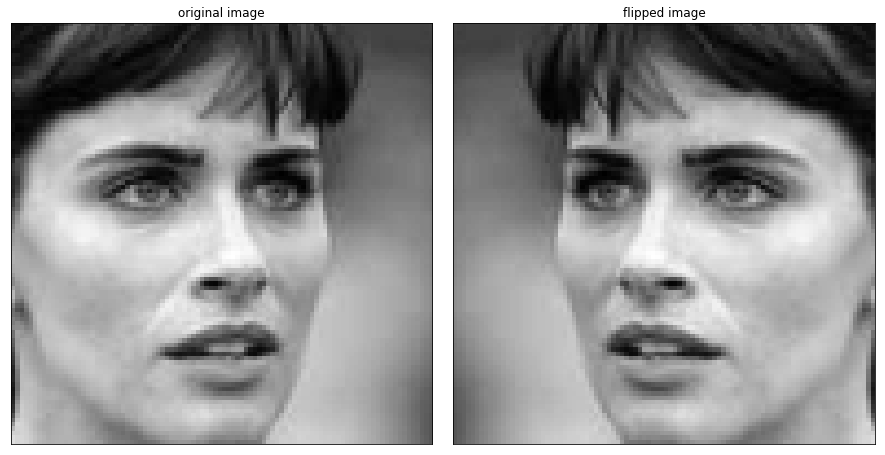

In [20]:
# Set figure information
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(
left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot original flipped images
axis = fig.add_subplot(2, 2, 1, xticks = [], yticks = [], title='original image')
axis.imshow(train_X[0].reshape(96,96),cmap='gray')
axis = fig.add_subplot(2, 2, 2, xticks = [], yticks = [], title='flipped image')
axis.imshow(train_X_flipped[0].reshape(96,96), cmap='gray') 
plt.show()

And see that the labels, too, are correctly flipped

left_eye_center_x left_eye_center_y


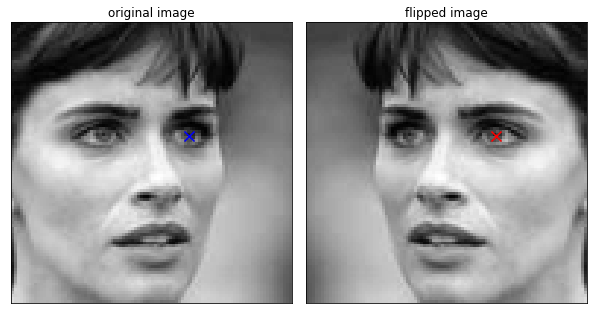

right_eye_center_x right_eye_center_y


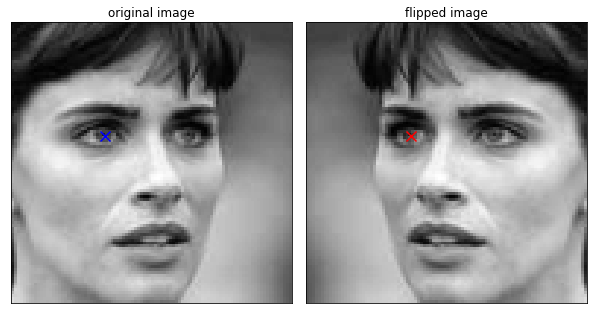

left_eyebrow_inner_end_x left_eyebrow_inner_end_y


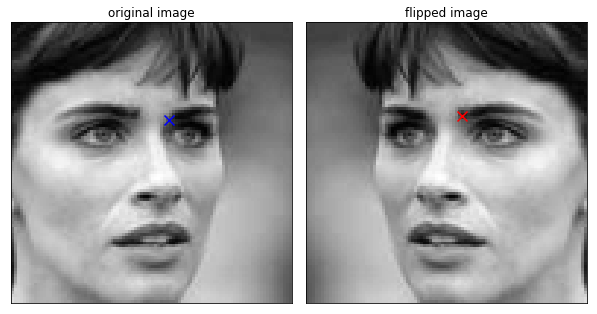

right_eyebrow_outer_end_x right_eyebrow_outer_end_y


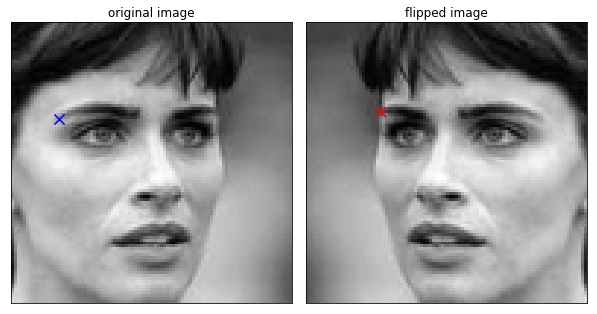

mouth_left_corner_x mouth_left_corner_y


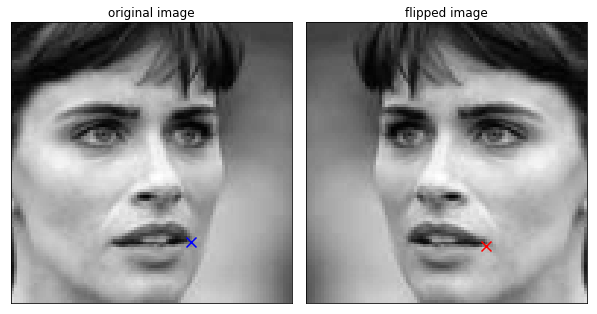

mouth_right_corner_x mouth_right_corner_y


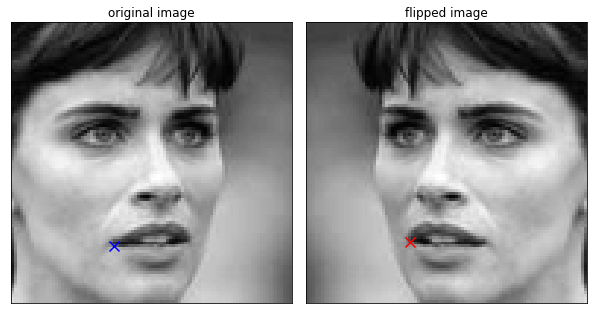

mouth_center_top_lip_x mouth_center_top_lip_y


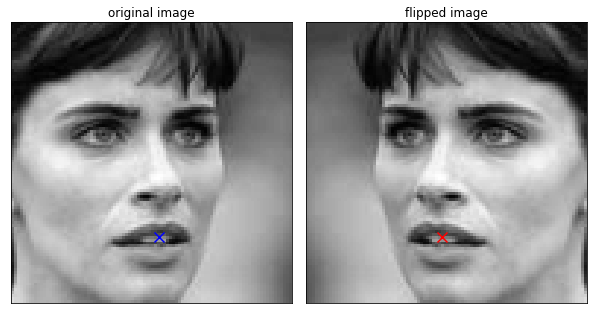

In [22]:
# Select labels to display
example_label_combos = [(0,1), (2,3), (12,13),(18,19), 
                        (22,23), (24,25), (26,27)]

# For each label, plot to show labels are flipped correctly
for item in example_label_combos:
  # Print label description
  print(train_labels[item[0]], train_labels[item[1]])

  keypoints_1_flipped = train_y_flipped[0,:]
  keypoints_2_flipped = keypoints_1_flipped*48 + 48

  keypoints_1_orig = train_y[0,:]
  keypoints_2_orig = keypoints_1_orig*48 + 48

  # Plot
  fig = plt.figure(figsize=(8, 8))
  fig.subplots_adjust(
  left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

  axis = fig.add_subplot(2, 2, 2, xticks = [], yticks = [], title='flipped image')
  axis.imshow(train_X_flipped[0].reshape(96,96),cmap='gray')
  axis.scatter(keypoints_2_flipped[item[0]],
               keypoints_2_flipped[item[1]],
               c='r',marker="x", s=100)


  axis = fig.add_subplot(2, 2, 1, xticks = [], yticks = [],  title='original image')
  axis.imshow(train_X[0].reshape(96,96),cmap='gray')
  axis.scatter(keypoints_2_orig[item[0]],
               keypoints_2_orig[item[1]],
               c='b',marker="x", s=100)
  plt.show()

In [0]:
# Add the flipped images to our training data
more_data = np.append(train_X, train_X_flipped, axis=0)

more_labels = np.append(train_y, train_y_flipped, axis=0)

np.random.shuffle(more_data) 
np.random.shuffle(more_labels)

In [24]:
print(more_data.shape)
print(more_labels.shape)

(3684, 9216)
(3684, 30)


Now that we have some functions to engineer  the features in our training data, we can get a baseline accuracy measure for our predictions using KNN and Linear Regression classification models. With that baseline, we can then evaluate the magnitude of the expected increase in performance of the Neural Net model

# IV. KNN Classification and Scoring

The first of the baseline models to compare against the Neural Net model in prediction accuracy for facial keypoints is the K-Nearest Neighbors model. KNN uses "feature similarity" to predict values of new data points. 


*   Model: K -Nearest Neighbors
*   Cost and Objective: KNN has no explicit cost or objective functions as it is non-parametric, lazy learner model
*   k (number of nearest neighbours) and distance are hyperparameters. 
*   The distance function used in this model will be the Euclidean ($l$2) Distance (which is the sklearn default) and will not be optimized for as we are only interested in a baseline value for RMSE against the dev data using kNN
*   Hyperparameter k chosen by comparing regression coefficient R^2 for predictions against subsets of the training data (using a folding algorithm)
*   Dev Data Scoring: RMSE (Root Mean Square Error)

A note on using RMSE for scoring: This method is chosen for evaluation because the kaggle competition uses it to score the models that are submitted. This method punishes large errors. The better a model does in prediction, the LOWER the RMSE will be.

### a) Original Training Data

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, make_scorer

import warnings
warnings.filterwarnings("ignore")

# We will use the KNN Regressor algorithm in sklearn that calculates the 
# average of the numerical target of the K-nearest Neighbors .
# each label output is a regression value as opposed to a classifier

# find optimal k using GridSearchCV - which uses a folding technique to internally
# generate train and dev data

param = {'n_neighbors': [2,3,4,5,6,7,8,9]}
knn_regressor = KNeighborsRegressor()
score_method = make_scorer(r2_score)
knn_search = GridSearchCV(knn_regressor, param, cv=5, scoring=score_method)
knn_search.fit(train_X, train_y)
best_k = knn_search.best_params_  
optimal_k = knn_search.best_params_['n_neighbors']

print("optimal k: ", optimal_k)

optimal k:  5


In [26]:
# Now run predictions on dev set using the optimal k from above
knn=KNeighborsRegressor(n_neighbors = optimal_k)
knn.fit(train_X, train_y)
dev_predict_label= knn.predict(dev_X)

print("RMSE of dev data: %.5f" % np.sqrt(mean_squared_error(dev_y, dev_predict_label)))

RMSE of dev data: 0.05225


RMSE for each label
left_eye_center_x : 0.037402477
left_eye_center_y : 0.03682094
right_eye_center_x : 0.038087893
right_eye_center_y : 0.036924597
left_eye_inner_corner_x : 0.03284698
left_eye_inner_corner_y : 0.03126577
left_eye_outer_corner_x : 0.047469396
left_eye_outer_corner_y : 0.043023597
right_eye_inner_corner_x : 0.033167753
right_eye_inner_corner_y : 0.03192633
right_eye_outer_corner_x : 0.046417978
right_eye_outer_corner_y : 0.045209505
left_eyebrow_inner_end_x : 0.04269119
left_eyebrow_inner_end_y : 0.04630125
left_eyebrow_outer_end_x : 0.0564499
left_eyebrow_outer_end_y : 0.06686415
right_eyebrow_inner_end_x : 0.044078678
right_eyebrow_inner_end_y : 0.04585312
right_eyebrow_outer_end_x : 0.058940772
right_eyebrow_outer_end_y : 0.06053864
nose_tip_x : 0.0548207
nose_tip_y : 0.062403783
mouth_left_corner_x : 0.062388793
mouth_left_corner_y : 0.07176053
mouth_right_corner_x : 0.059195966
mouth_right_corner_y : 0.06965258
mouth_center_top_lip_x : 0.049800605
mouth_center_top

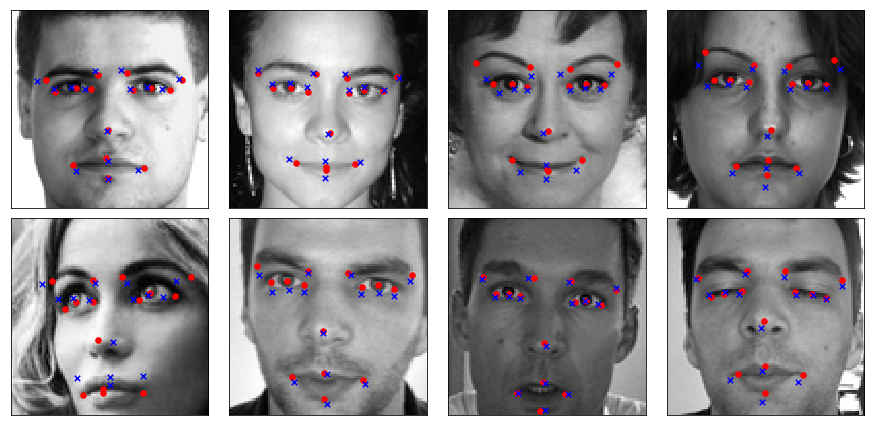

In [27]:
# List out all of the label names and performance on an individual basis on the dev data
label_names = list(pd.DataFrame(pd.read_csv(filepath + 'training.csv')).columns)[:-1]

#how each individual label performed 
RMSE = np.sqrt(metrics.mean_squared_error(dev_y, dev_predict_label, multioutput='raw_values'))

print('RMSE for each label')

for i in range(len(RMSE)):
  print(label_names[i], ':', RMSE[i])
  
print("\nSamples showing actual labels in red and predicted values in blue")
  
plot_sample(dev_X[0:8], dev_y[0:8], dev_predict_label[0:8])   


### b) Use accentuated images  

Note that we are not re-fitting k, only using the optimum k found above using the original training data

RMSE of dev data on accentuated images: 0.05594

RMSE for each label of accentuated images
left_eye_center_x : 0.038911577
left_eye_center_y : 0.039080884
right_eye_center_x : 0.039381824
right_eye_center_y : 0.040423192
left_eye_inner_corner_x : 0.036055498
left_eye_inner_corner_y : 0.03400003
left_eye_outer_corner_x : 0.049126
left_eye_outer_corner_y : 0.04506607
right_eye_inner_corner_x : 0.036644224
right_eye_inner_corner_y : 0.035794098
right_eye_outer_corner_x : 0.04900144
right_eye_outer_corner_y : 0.04902391
left_eyebrow_inner_end_x : 0.044343814
left_eyebrow_inner_end_y : 0.04949108
left_eyebrow_outer_end_x : 0.057149004
left_eyebrow_outer_end_y : 0.06607207
right_eyebrow_inner_end_x : 0.044859424
right_eyebrow_inner_end_y : 0.05272484
right_eyebrow_outer_end_x : 0.060545903
right_eyebrow_outer_end_y : 0.06599772
nose_tip_x : 0.057483714
nose_tip_y : 0.07359051
mouth_left_corner_x : 0.06558502
mouth_left_corner_y : 0.07558298
mouth_right_corner_x : 0.06632807
mouth_right_corne

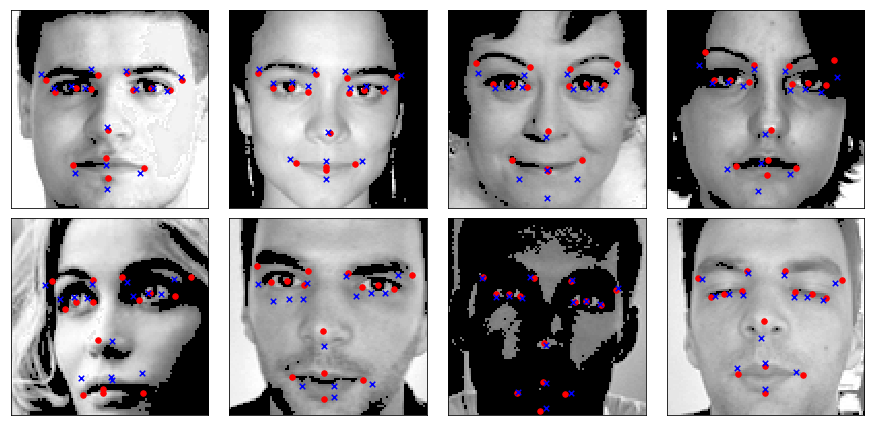

In [144]:
knn=KNeighborsRegressor(n_neighbors = optimal_k)

# fit the KNN model
preprocessed_train = accentuate_image(train_X)
knn.fit(preprocessed_train, train_y)

#and predict the labels
accentuate_dev = accentuate_image(dev_X)
dev_predict_label= knn.predict(dev_X)

#Total RMSE of dev data
print("RMSE of dev data on accentuated images: %.5f" % np.sqrt(mean_squared_error(dev_y, dev_predict_label)))

# Display the Root Mean Squared Error for each label
RMSE = np.sqrt(metrics.mean_squared_error(dev_y, dev_predict_label, multioutput = 'raw_values'))

print('\nRMSE for each label of accentuated images')
for i in range(len(RMSE)):
  print(label_names[i], ':', RMSE[i])
  
plot_sample(accentuate_dev[0:8], dev_y[0:8], dev_predict_label[0:8])

### c) Use blurred images

RMSE of dev data using blurred images: 0.05225

RMSE for each label in blurred images
left_eye_center_x : 0.03761624
left_eye_center_y : 0.036727294
right_eye_center_x : 0.037747182
right_eye_center_y : 0.037561502
left_eye_inner_corner_x : 0.0328364
left_eye_inner_corner_y : 0.03143659
left_eye_outer_corner_x : 0.047167357
left_eye_outer_corner_y : 0.04288514
right_eye_inner_corner_x : 0.03325573
right_eye_inner_corner_y : 0.032308787
right_eye_outer_corner_x : 0.045760095
right_eye_outer_corner_y : 0.04543771
left_eyebrow_inner_end_x : 0.04200202
left_eyebrow_inner_end_y : 0.046574835
left_eyebrow_outer_end_x : 0.05677583
left_eyebrow_outer_end_y : 0.06608953
right_eyebrow_inner_end_x : 0.043438327
right_eyebrow_inner_end_y : 0.04648851
right_eyebrow_outer_end_x : 0.05786714
right_eyebrow_outer_end_y : 0.059710257
nose_tip_x : 0.05425671
nose_tip_y : 0.061958738
mouth_left_corner_x : 0.061489075
mouth_left_corner_y : 0.07269159
mouth_right_corner_x : 0.058956012
mouth_right_corner_y 

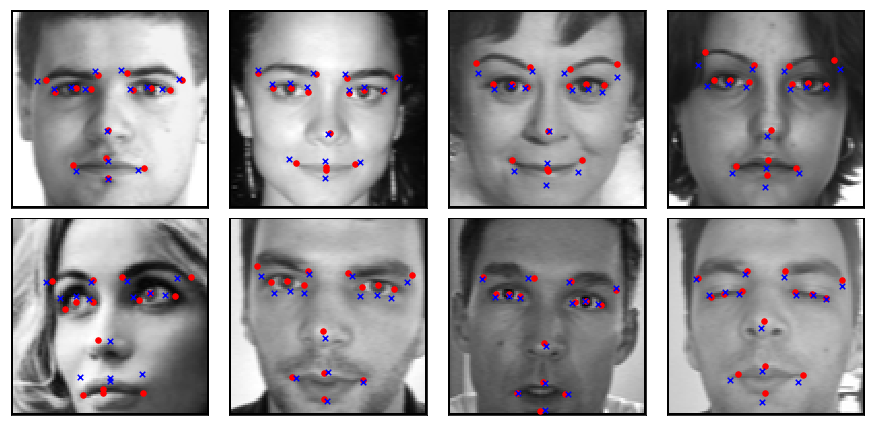

In [143]:
knn=KNeighborsRegressor(n_neighbors = optimal_k)

# fit the KNN model
preprocessed_train = Blur_image(train_X)
knn.fit(preprocessed_train, train_y)

#and predict the labels - here we will blur the dev data
blur_dev = Blur_image(dev_X)
dev_predict_label= knn.predict(blur_dev)

#Total RMSE of dev data
print("RMSE of dev data using blurred images: %.5f" % np.sqrt(mean_squared_error(dev_y, dev_predict_label)))

# Display the Root Mean Squared Error for each label
RMSE = np.sqrt(metrics.mean_squared_error(dev_y, dev_predict_label, multioutput = 'raw_values'))

print('\nRMSE for each label in blurred images')
for i in range(len(RMSE)):
  print(label_names[i], ':', RMSE[i])
  
plot_sample(blur_dev[0:8], dev_y[0:8], dev_predict_label[0:8])

### d) Use larger data set with flipped images  
This will create a doubled data set that is fully labelled (similar to bootstrapping)

In [0]:
# Combine original image with flipped image
more_data1 = np.append(train_X, train_X_flipped, axis=0)


more_labels1 = np.append(train_y, train_y_flipped, axis=0)


# shuffle the combined train data
s=np.arange(more_data1.shape[0])
np.random.shuffle(s)

more_data = more_data1[s]
more_labels = more_labels1[s]

In [31]:
knn=KNeighborsRegressor(n_neighbors = optimal_k)

# fit the KNN model
knn.fit(more_data, more_labels)

#and predict the labels
dev_predict_label= knn.predict(dev_X)

#Total RMSE of dev data
print("RMSE of dev data using larger training set: %.5f" % np.sqrt(mean_squared_error(dev_y, dev_predict_label)))

# Display the Root Mean Squared Error for each label
RMSE = np.sqrt(metrics.mean_squared_error(dev_y, dev_predict_label, multioutput = 'raw_values'))

print('\nRMSE for each label')
for i in range(len(RMSE)):
  print(label_names[i], ':', RMSE[i])

RMSE of dev data using larger training set: 0.05201

RMSE for each label
left_eye_center_x : 0.036791519560181375
left_eye_center_y : 0.03777189998835135
right_eye_center_x : 0.03776858433958992
right_eye_center_y : 0.03761437559560917
left_eye_inner_corner_x : 0.031786720891539375
left_eye_inner_corner_y : 0.03141364687580275
left_eye_outer_corner_x : 0.04514347340554509
left_eye_outer_corner_y : 0.04344737976007364
right_eye_inner_corner_x : 0.032887041691255794
right_eye_inner_corner_y : 0.03289110454171217
right_eye_outer_corner_x : 0.045568409718155664
right_eye_outer_corner_y : 0.04481105112913172
left_eyebrow_inner_end_x : 0.04097376590992547
left_eyebrow_inner_end_y : 0.04632465092348639
left_eyebrow_outer_end_x : 0.05458175896285223
left_eyebrow_outer_end_y : 0.06670280028297616
right_eyebrow_inner_end_x : 0.04259482081970256
right_eyebrow_inner_end_y : 0.04685526549404313
right_eyebrow_outer_end_x : 0.05821176327436356
right_eyebrow_outer_end_y : 0.05927622824248807
nose_tip_

The K-Nearest Neighbors Model shows strong performance with a 0.05 RMSE, which might be sufficient in some circumstances. For proper identification, however, it likely is not good enough, especially noting that the RMSE for each label varies greatly. 

Additionally, it does not seem like the features engineering methods attempted significantly improved the performance at all.

# V. Linear Regression Classification & Scoring

To get another baseline for how well the Neural Net model performs, here we fit and train a Linear Regression model to predict the facial keypoint locations for our DEV data set. This model assumes a linear relationship between the dependent variables (x/y coordinates for facial keypoints) and the independent variables (the 9216 features in each image data vector) when mapping the best-fit hyper-plane to estimate the coordinates of the facial keypoints.

In order to find the best-fit hyperplane (i.e. find the best parameters for our model), the cost function is is the Mean Square Error, when using the LR algorithm in sklearn. The objective is to  find the parameters such that the uniform average MSE is minimzed. To do that we will use Gradient Descent.

To ensure comparison between this model and the kNN and Neural Net models, given that the facial keypoint coordinates that we are trying to predict are continuous values, we will use the Root Mean Squared Error (RMSE) to gauge how well the model predicts the labeled values in the DEV data. Squaring the difference between $\hat{y}$ and $y$ will penalize predicted values that are far from the actual coordinate values. It is unfortunate that essentially the same metric is used for evaluating the model (RMSE) and optimizing for the parameters in the model (MSE), but this is a feature of the linear regression model and the gradient descent method.

In summary:
* Model: Linear Regression
* Cost Function: Mean Squared Error (MSE)
* Objective: Minimize the unifrom average MSE
* Methodology: Gradient Descent
* Scoring: use RMSE to score performance on the Dev data using optimal parameters determined in the fit 

### a) Original Training Data

RMSE uniform average for the model: 0.05693019

RMSE for each label
left_eye_center_x : 0.041283246
left_eye_center_y : 0.035981543
right_eye_center_x : 0.04164554
right_eye_center_y : 0.03592273
left_eye_inner_corner_x : 0.039211925
left_eye_inner_corner_y : 0.033111088
left_eye_outer_corner_x : 0.049773213
left_eye_outer_corner_y : 0.04115612
right_eye_inner_corner_x : 0.04079971
right_eye_inner_corner_y : 0.03604317
right_eye_outer_corner_x : 0.05583152
right_eye_outer_corner_y : 0.041999083
left_eyebrow_inner_end_x : 0.053948753
left_eyebrow_inner_end_y : 0.053150058
left_eyebrow_outer_end_x : 0.0629526
left_eyebrow_outer_end_y : 0.068907544
right_eyebrow_inner_end_x : 0.04808287
right_eyebrow_inner_end_y : 0.05612929
right_eyebrow_outer_end_x : 0.06679716
right_eyebrow_outer_end_y : 0.06986443
nose_tip_x : 0.053566284
nose_tip_y : 0.07533058
mouth_left_corner_x : 0.07058037
mouth_left_corner_y : 0.073617145
mouth_right_corner_x : 0.06254947
mouth_right_corner_y : 0.072772324
mouth

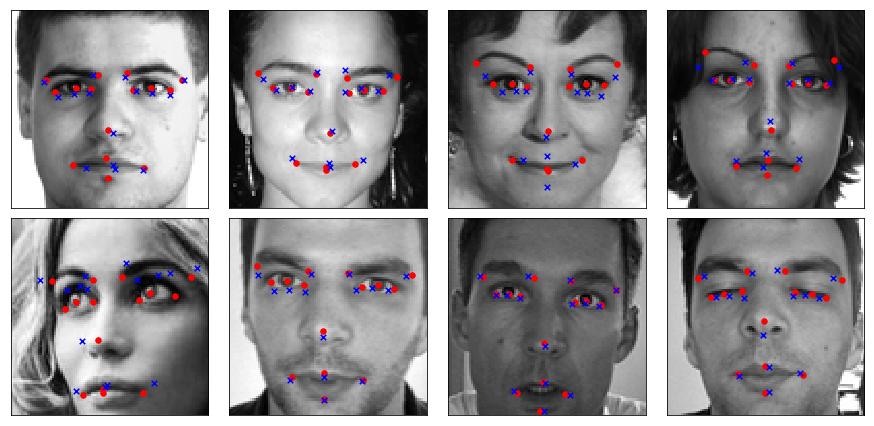

In [32]:
# Instantiate a LR model with the LinearRegression class

# Set the multi_class parameter to 'multinomial' as our outputs are not
# binomial, hence one-vs-rest will not work as well

# In order to use multinomial option, we need a non "liblinear" solver
# Available solvers for multinomial: ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ 

lr_mod = LinearRegression()

# List out all of the label names
label_names = list(train_labels)

# fit the Linear Regression model to the un-modified data
lr_mod.fit(train_X, train_y)

# Predict the labels on the dev set
lr_pred = lr_mod.predict(dev_X)

# Display the Root Mean Squared Error for each label
RMSE = np.sqrt(metrics.mean_squared_error(dev_y, 
                                          lr_pred, 
                                          multioutput = 'raw_values'))

print('RMSE uniform average for the model:',
     np.sqrt(metrics.mean_squared_error(dev_y, 
                                        lr_pred, 
                                        multioutput = 'uniform_average')))

print('\nRMSE for each label')
for i in range(len(RMSE)):
  print(label_names[i], ':', RMSE[i])
  

plot_sample(dev_X[0:8], dev_y[0:8], lr_pred[0:8])

### b) Use accentuated images

RMSE uniform average for the model with accentuated images: 0.05142454

RMSE for each label with accentuated images
left_eye_center_x : 0.03826339
left_eye_center_y : 0.03155015
right_eye_center_x : 0.039512075
right_eye_center_y : 0.03423513
left_eye_inner_corner_x : 0.03301811
left_eye_inner_corner_y : 0.031024972
left_eye_outer_corner_x : 0.04721872
left_eye_outer_corner_y : 0.03602653
right_eye_inner_corner_x : 0.039234962
right_eye_inner_corner_y : 0.03286512
right_eye_outer_corner_x : 0.04882251
right_eye_outer_corner_y : 0.040343605
left_eyebrow_inner_end_x : 0.047334097
left_eyebrow_inner_end_y : 0.044999056
left_eyebrow_outer_end_x : 0.060697794
left_eyebrow_outer_end_y : 0.05890179
right_eyebrow_inner_end_x : 0.046651952
right_eyebrow_inner_end_y : 0.051060513
right_eyebrow_outer_end_x : 0.06050881
right_eyebrow_outer_end_y : 0.063595854
nose_tip_x : 0.05100872
nose_tip_y : 0.06531996
mouth_left_corner_x : 0.06520018
mouth_left_corner_y : 0.06938438
mouth_right_corner_x : 0.0

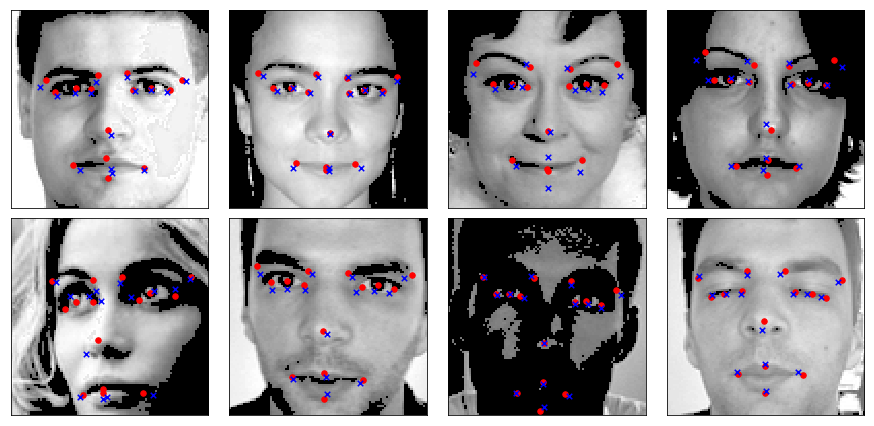

In [145]:
lr_mod = LinearRegression()

# fit the Linear Regression model
preprocessed_train  = accentuate_image(train_X)
lr_mod.fit(preprocessed_train, train_y)

# and predict the labels using the accentuated dev data
lr_pred = lr_mod.predict(accentuate_dev)

# Display the Root Mean Squared Error for each label
RMSE = np.sqrt(metrics.mean_squared_error(dev_y, 
                                          lr_pred, 
                                          multioutput = 'raw_values'))

print('RMSE uniform average for the model with accentuated images:',
     np.sqrt(metrics.mean_squared_error(dev_y, 
                                        lr_pred, 
                                        multioutput = 'uniform_average')))
  
print('\nRMSE for each label with accentuated images')
for i in range(len(RMSE)):
  print(label_names[i], ':', RMSE[i])
  
plot_sample(accentuate_dev[0:8], dev_y[0:8], lr_pred[0:8])

### c) Use blurred images

RMSE uniform average for the model with blurred images: 0.06409249307007389

RMSE for each label with blurred images
left_eye_center_x : 0.04578778581191648
left_eye_center_y : 0.04266494145149115
right_eye_center_x : 0.044916312684310324
right_eye_center_y : 0.03990178287182791
left_eye_inner_corner_x : 0.04420237472771482
left_eye_inner_corner_y : 0.03906068419513947
left_eye_outer_corner_x : 0.05624438582496931
left_eye_outer_corner_y : 0.048434031659176965
right_eye_inner_corner_x : 0.04375273545550376
right_eye_inner_corner_y : 0.040338203530318105
right_eye_outer_corner_x : 0.06186501954832464
right_eye_outer_corner_y : 0.046715059851802965
left_eyebrow_inner_end_x : 0.059715885765714606
left_eyebrow_inner_end_y : 0.060374638188068576
left_eyebrow_outer_end_x : 0.07099294469913048
left_eyebrow_outer_end_y : 0.07922035642693824
right_eyebrow_inner_end_x : 0.05362303305234484
right_eyebrow_inner_end_y : 0.061581450125960016
right_eyebrow_outer_end_x : 0.07428901336004418
right_eyeb

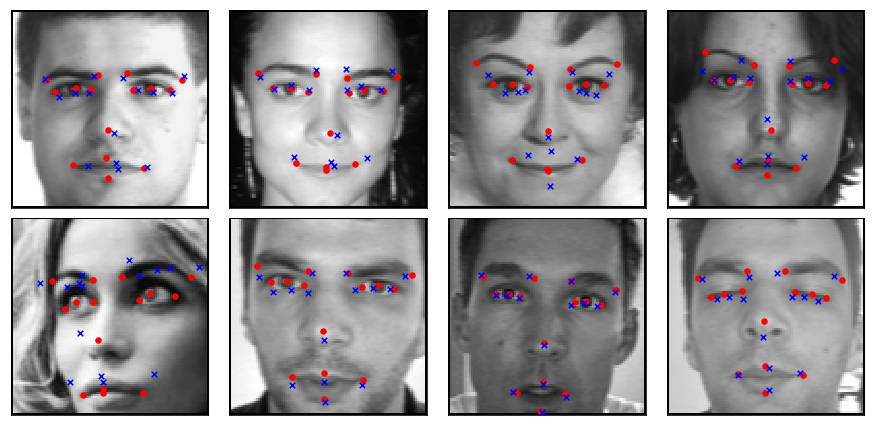

In [146]:
lr_mod = LinearRegression()

# fit the Linear Regression model
preprocessed_train = Blur_image(train_X)
lr_mod.fit(preprocessed_train, train_y)

# and predict the labels using blurred dev data
lr_pred = lr_mod.predict(blur_dev)

# Display the Root Mean Squared Error for each label
RMSE = np.sqrt(metrics.mean_squared_error(dev_y, 
                                          lr_pred, 
                                          multioutput = 'raw_values'))

print('RMSE uniform average for the model with blurred images:',
     np.sqrt(metrics.mean_squared_error(dev_y, 
                                        lr_pred, 
                                        multioutput = 'uniform_average')))
  
print('\nRMSE for each label with blurred images')
for i in range(len(RMSE)):
  print(label_names[i], ':', RMSE[i])
  
plot_sample(blur_dev[0:8], dev_y[0:8], lr_pred[0:8])

### d) Use larger data set with flipped images

RMSE uniform average for the model: 0.06705126973633233

RMSE for each label
left_eye_center_x : 0.04755492138312143
left_eye_center_y : 0.04786774066767164
right_eye_center_x : 0.04930928653593091
right_eye_center_y : 0.04798721354069702
left_eye_inner_corner_x : 0.04450576848999002
left_eye_inner_corner_y : 0.044647603699979305
left_eye_outer_corner_x : 0.06018532010979089
left_eye_outer_corner_y : 0.05660602622706225
right_eye_inner_corner_x : 0.050599501206987134
right_eye_inner_corner_y : 0.04555493395620938
right_eye_outer_corner_x : 0.06208773587950625
right_eye_outer_corner_y : 0.0528031180675606
left_eyebrow_inner_end_x : 0.05895884182289863
left_eyebrow_inner_end_y : 0.058291119661731
left_eyebrow_outer_end_x : 0.0743237094292892
left_eyebrow_outer_end_y : 0.08201606679504927
right_eyebrow_inner_end_x : 0.05725616763020735
right_eyebrow_inner_end_y : 0.059049507852008264
right_eyebrow_outer_end_x : 0.07995373846001028
right_eyebrow_outer_end_y : 0.07967021831961343
nose_tip_x

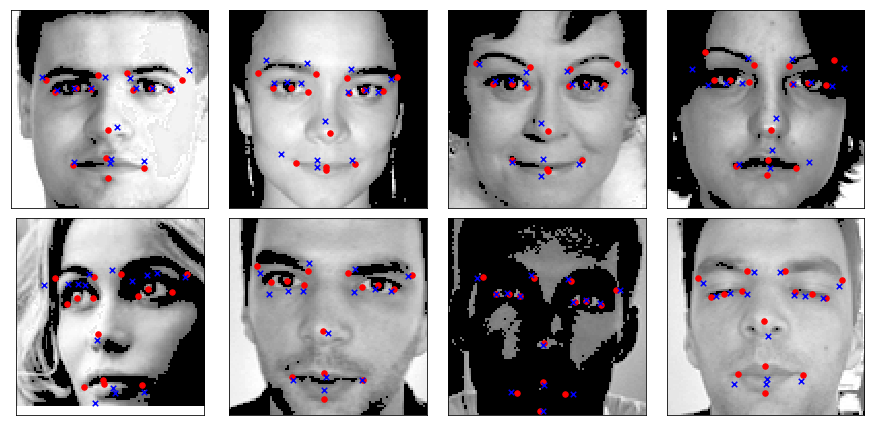

In [38]:
# with MORE DATA

lr_mod = LinearRegression()
lr_mod.fit(more_data, more_labels)

# and predict the labels
lr_pred = lr_mod.predict(dev_X)

# Display the Root Mean Squared Error for each label
RMSE = np.sqrt(metrics.mean_squared_error(dev_y, 
                                          lr_pred, 
                                          multioutput = 'raw_values'))

print('RMSE uniform average for the model:',
     np.sqrt(metrics.mean_squared_error(dev_y, 
                                        lr_pred, 
                                        multioutput = 'uniform_average')))

print('\nRMSE for each label')
for i in range(len(RMSE)):
  print(label_names[i], ':', RMSE[i])
  
plot_sample(accentuate_image(dev_X[0:8]), dev_y[0:8], lr_pred[0:8])

### e) Add labels to incomplete training data

In [39]:
incomplete_train_X, incomplete_train_y, incomplete_train_labels = load_data(data_type = 'train', data = 'incomplete')
#train_X, train_y, train_labels = load_data(data_type = 'train', data='complete')

Number of rows total after dropping completely labeled data = 4158


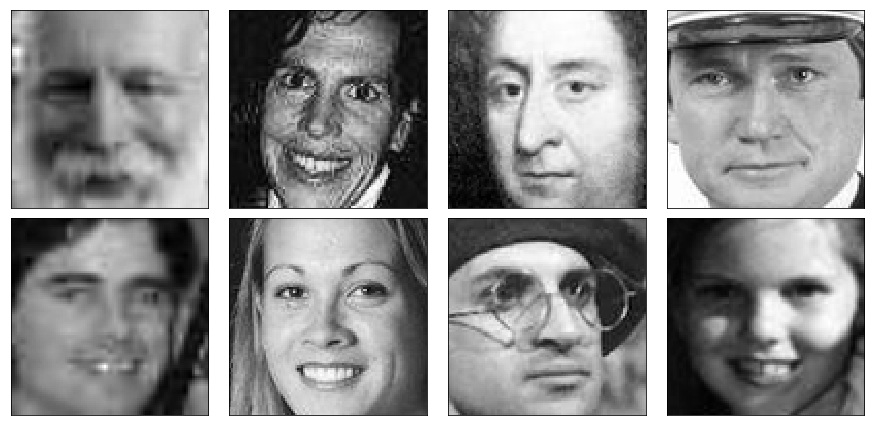

In [40]:
plot_sample(incomplete_train_X[0:8], incomplete_train_y[0:8])

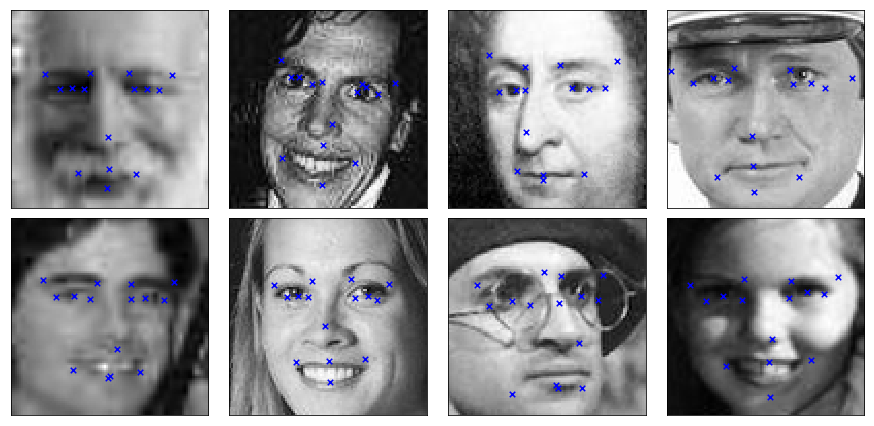

In [41]:
lr_mod = LinearRegression()

lr_mod.fit(train_X, train_y)
# and predict the labels
lr_pred = lr_mod.predict(incomplete_train_X)

# No need for RMSE since these images have missing/incomplete/no labels

plot_sample(incomplete_train_X[0:8], np.nan, lr_pred[0:8])

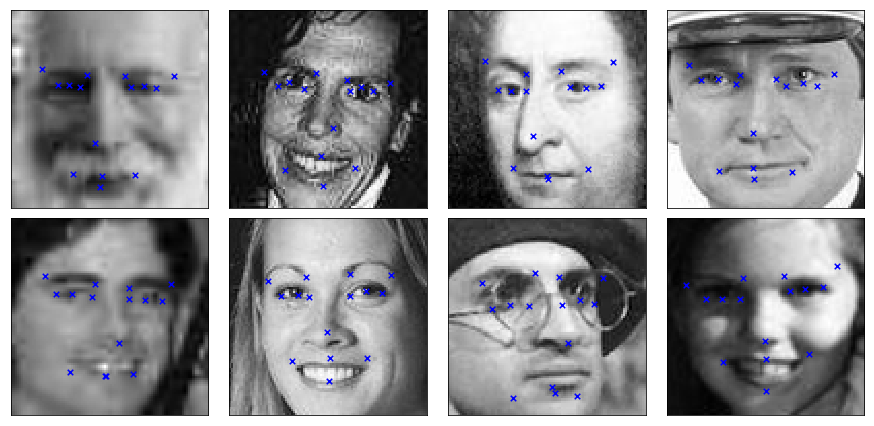

In [42]:
lr_mod = LinearRegression()

lr_mod.fit(accentuate_image(train_X), train_y)
# and predict the labels
lr_pred = lr_mod.predict(accentuate_image(incomplete_train_X))

# No need for RMSE since these images have missing/incomplete/no labels


plot_sample(incomplete_train_X[0:8], np.nan, lr_pred[0:8])

# VI. Neural Networks

Image data such as the faces we are working with here, suffer from the Curse of Dimensionality, that is, we have a very high dimension feature space (9216) and a comparatively small number of examples  (~2140 complete examples, up to 6000 if we include those only partially labeled). Additionally, we are only looking to fit 15 'labels' (15 facial keypoints). This data is thus extremely sparse.

As seen in Sections IV and V, the kNN and linear models perform at a basic level, with an RMSE of 0.052 for basic kNN and 0.056 for linear regression. In those models, feature engineering (blurring, accentuating and flipping images) did not change the error in any significant fashion, and in some cases, made the predictions worse. 

In this section, we will use both a single layer and multiple layer neural nets to make predictions of facial keypoints. We expect that the multiple hidden layer model(s) will result in much lower RMSEs when compared to simple kNN or linear models. Neural Nets have long been used to classify and identify images, due to the ability to incorporate non-linearity in the model as well as the ability to deal effectively with data sets that are extremely sparse (and suffer from high dimensional features and low numbers of examples). 


First, create the datasets combining different feature engineering components. We only work with 1 feature engineering element at a time, not combining them.
* `train_X` --> original data, no engineering, full labels
* `accentuated` --> original data, only accentuated, full labels
* `blurred` --> original data, only blurred, full labels
* `more_data` --> original data + flipped image data, no other engineering, full labels

Now, combining feature engineering:
* `accent_more` --> more_data, accentuated only, full labels
* `blur_more` --> more_data, blurred only, full labels


In [0]:
accentuated = accentuate_image(train_X)
blurred = Blur_image(train_X)

# Accentuated Images
accent_more = accentuate_image(more_data) # accentuated flipped and original image 
accent_dev_X = accentuate_image(dev_X) # accentuated image for dev data

# Blur Image
blur_more = Blur_image(more_data) # Blur flipped and original image belongs to train data
blur_dev_X = Blur_image(dev_X) # Blur image for dev data

Functions for plotting examples and scoring using RMSE

In [0]:
def plot_example(x, y, axis, predicted_label=np.nan):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter((y.reshape(15,2) * 48 + 48)[:,0], (y.reshape(15,2) * 48 + 48)[:,1], marker='o', s=30, c='red')
    
    if np.all(np.isfinite(predicted_label)):
            plt.scatter((predicted_label.reshape(15,2) * 48 + 48)[:,0], (predicted_label.reshape(15,2) * 48 + 48)[:,1], c='blue', marker='x', label='predicted')

    return

In [0]:
def score(y,y_pred):
        return np.sqrt(mean_squared_error(y, y_pred))

## A) Single Layer Neural Network (Perceptron)
### Following methodology is applied to improve performance of single layer neural network:

*   Learning rate: 0.01 and 0.001
*   Activation Function: linear regression and tanh function  (Sigmoid/softmax do not work in this model, because the keypoint pairs range from -1 to 1, but the sigmoid function predicts labels only in the range from 0 to 1)
*   Gradient Descent: batch, stochastic, and mini-batch 

### A1-1) Single Layer Neural Network with Tanh Activation Function

Data: `train_X` --> original data with full labels

*   model: single layer neural network with tanh activation function
*   cost function: RMSE
*   Objective: minimize RMSE
*   Methodology: batch gradient descent
     * Learning Rate: 0.01



epoch #, RMSE (1, 0.28490381740721377)
epoch #, RMSE (2, 0.22748672083399835)
epoch #, RMSE (3, 0.19406192567707886)
epoch #, RMSE (4, 0.23517523910761068)
epoch #, RMSE (5, 0.20201176292852416)
epoch #, RMSE (6, 0.2402969608787262)
epoch #, RMSE (7, 0.22977540474176508)
epoch #, RMSE (8, 0.2570761840883049)
epoch #, RMSE (9, 0.24219560651210909)
epoch #, RMSE (10, 0.2541683805306183)
epoch #, RMSE (11, 0.25412432241093447)
epoch #, RMSE (12, 0.2519638512830373)
epoch #, RMSE (13, 0.2507909378936227)
epoch #, RMSE (14, 0.2580238919708708)
epoch #, RMSE (15, 0.25329932342080713)
epoch #, RMSE (16, 0.2510757919698921)
epoch #, RMSE (17, 0.25832039769444926)
epoch #, RMSE (18, 0.25261382116678904)
epoch #, RMSE (19, 0.255931594278737)
epoch #, RMSE (20, 0.2552781399120093)
epoch #, RMSE (21, 0.25551720478169315)
epoch #, RMSE (22, 0.2557038177704025)
epoch #, RMSE (23, 0.2543023250303141)
epoch #, RMSE (24, 0.25688028684839337)
epoch #, RMSE (25, 0.2536217096641031)
train time =  5.443210

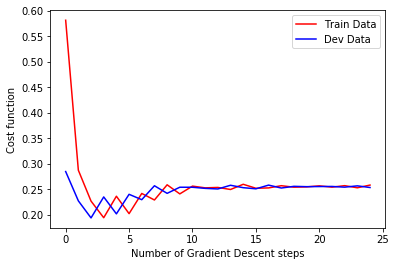

In [54]:
## (1) Parameters 
# Get number of features
num_features = train_X.shape[1]
# Then get the number of keypoints from labels
num_labels = train_y.shape[1]
np.random.seed(0) # Setting random seed

# Initialize the weights to small, but non-zero, values.
# N(mu,sigma^2) --> sigma * np.random.randn() + mu
# each column is weight set for one output (y1), so total 30 columns for y1, y2...y30
w = theano.shared(np.asarray((np.random.randn(*(num_features, num_labels))*.01))) 

## (2) Model
# Theano objects accessed with standard Python variables
X = T.matrix()
Y = T.matrix()

# Tanh activation model is applied for multiple outputs
def model(X, w):
    return T.tanh(T.dot(X, w))
    
y_hat = model(X, w)

## (3) Cost function - RMSE
cost = T.sqrt(T.mean((Y - y_hat)**2))

## (4) Objective (and gradient descent solver)
alpha = 0.01 # Learning Rate
gradient = T.grad(cost=cost, wrt=w) 
update = [[w, w - gradient * alpha]] 
train = theano.function(inputs=[X, Y], outputs=cost, updates=update, allow_input_downcast=True) # computes cost, then runs update
predict = theano.function(inputs=[X], outputs=y_hat, allow_input_downcast=True) # dtype np.float64 and your variable is instantiated to have dtype np.float32, the input is converted to np.float32 when the flag is set to True.

def gradientDescent(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    for i in range(epochs):
        start_time = time.time()
        cost = train(train_X[0:len(train_X)], train_y[0:len(train_X)])
        cost_vec.append(cost)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('epoch #, RMSE', (i+1, RMSE))
        
    print('train time = ', trainTime)

    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()

gradientDescent(25)


The above Cost vs. Number of Epochs plot shows that the cost levels out at 0.25 with 10 epochs. The way to further reduce the cost and improve model accuracy is to try a different learning rate. 

### A1-2) Single Layer Neural Network with Tanh Activation Function

Data: `train_X` --> original data with full labels

* model: single layer neural network with tanh activation function
* cost function: RMSE
* Objective: minimize RMSE
* Methodology: batch gradient descent
   * Learning Rate: 0.001

epoch#, RMSE (1, 0.5477769429428313)
epoch#, RMSE (2, 0.5141754398012384)
epoch#, RMSE (3, 0.47899504397386755)
epoch#, RMSE (4, 0.4421201964241385)
epoch#, RMSE (5, 0.40357287558049204)
epoch#, RMSE (6, 0.3636792620059958)
epoch#, RMSE (7, 0.3231701759737839)
epoch#, RMSE (8, 0.28341294975824277)
epoch#, RMSE (9, 0.24683475916761535)
epoch#, RMSE (10, 0.21670907655372554)
epoch#, RMSE (11, 0.19536780822874675)
epoch#, RMSE (12, 0.18236200260395288)
epoch#, RMSE (13, 0.175159165081559)
epoch#, RMSE (14, 0.17123172949718918)
epoch#, RMSE (15, 0.16898443813104724)
epoch#, RMSE (16, 0.16758712029299502)
epoch#, RMSE (17, 0.16663233516302725)
epoch#, RMSE (18, 0.1659191265550361)
epoch#, RMSE (19, 0.16534515287808924)
epoch#, RMSE (20, 0.16485601668688263)
epoch#, RMSE (21, 0.1644214392606039)
epoch#, RMSE (22, 0.16402377795112022)
epoch#, RMSE (23, 0.16365229863244574)
epoch#, RMSE (24, 0.16330020703332015)
epoch#, RMSE (25, 0.16296304775872603)
epoch#, RMSE (26, 0.1626378062527423)
epoch

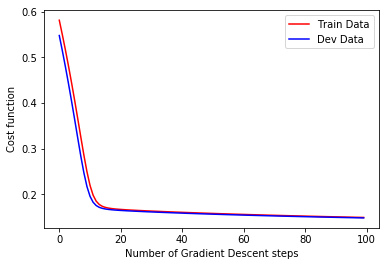

In [56]:
## (1) Parameters 
# Get number of features
num_features = train_X.shape[1]
# Then get the number of keypoints from labels
num_labels = train_y.shape[1]
np.random.seed(0) # Setting random seed

# Initialize the weights to small, but non-zero, values.
# N(mu,sigma^2) --> sigma * np.random.randn() + mu
# each column is weight set for one output (y1), so total 30 columns for y1, y2...y30
w1 = theano.shared(np.asarray((np.random.randn(*(num_features, num_labels))*.01))) 

## (2) Model
# Theano objects accessed with standard Python variables
X1 = T.matrix()
Y1 = T.matrix()

# Tanh is applied for activation model of multiple outputs
def model1(X1, w1): 
    return T.tanh(T.dot(X1, w1))
    
y_hat1 = model1(X1, w1)

## (3) Cost function
cost1 = T.sqrt(T.mean((Y1 - y_hat1)**2))

## (4) Objective (and solver)
alpha1 = 0.001 # Learning Rate
gradient1 = T.grad(cost=cost1, wrt=w1) 
update1 = [[w1, w1 - gradient1 * alpha1]] 
train1 = theano.function(inputs=[X1, Y1], outputs=cost1, updates=update1, allow_input_downcast=True) # computes cost, then runs update
predict1 = theano.function(inputs=[X1], outputs=y_hat1, allow_input_downcast=True) # dtype np.float64 and your variable is instantiated to have dtype np.float32, the input is converted to np.float32 when the flag is set to True.

def gradientDescent(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    for i in range(epochs):
        start_time = time.time()
        cost1 = train1(train_X[0:len(train_X)], train_y[0:len(train_X)])
        cost_vec.append(cost1)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict1(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('epoch#, RMSE', (i+1, RMSE))
        
    print('train time = ', trainTime)
    
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()

gradientDescent(100)


Using the tanh activation function and reducing learning rate to 0.001, we see from the above Cost vs. Number of Epochs plot that the cost is significantly reduced to ~0.15 at 100 epochs. With the smaller learning rate, the curve becomes more smooth and approaches local minimization step by step. Using this learning rate, the next step is to study the effect of the activation funcation.

### A2) Single Layer Neural Network with linear regression 

Data: train_X --> original data with full labels

* model: single layer neural network with linear regression
* cost function: RMSE
* Objective: minimize RMSE
* Methodology: batch gradient descent
    * Learning Rate: 0.001

epoch#, RMSE (1, 0.6006157117346136)
epoch#, RMSE (2, 0.5339198774425029)
epoch#, RMSE (3, 0.46965835674417694)
epoch#, RMSE (4, 0.4087979008939792)
epoch#, RMSE (5, 0.35274100092961097)
epoch#, RMSE (6, 0.303421927089202)
epoch#, RMSE (7, 0.26315490432538413)
epoch#, RMSE (8, 0.2338348422979574)
epoch#, RMSE (9, 0.21549761169662587)
epoch#, RMSE (10, 0.2057011815561004)
epoch#, RMSE (11, 0.20100228148549912)
epoch#, RMSE (12, 0.1987762476713048)
epoch#, RMSE (13, 0.19760935991170803)
epoch#, RMSE (14, 0.19686977239870584)
epoch#, RMSE (15, 0.19629920792635647)
epoch#, RMSE (16, 0.1957963297374409)
epoch#, RMSE (17, 0.1953221905276491)
epoch#, RMSE (18, 0.19486202183285187)
epoch#, RMSE (19, 0.19441028922278042)
epoch#, RMSE (20, 0.1939649416003326)
epoch#, RMSE (21, 0.19352522272294834)
epoch#, RMSE (22, 0.19309084743978694)
epoch#, RMSE (23, 0.19266169599919603)
epoch#, RMSE (24, 0.1922377030159682)
epoch#, RMSE (25, 0.1918188185608807)
epoch#, RMSE (26, 0.19140499540294528)
epoch#, 

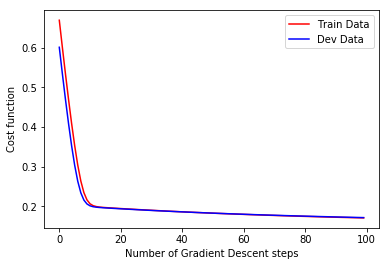

In [57]:
## (1) Parameters 
# Get number of features
num_features = train_X.shape[1]
# Then get the number of keypoints from labels
num_labels = train_y.shape[1]
np.random.seed(0) # Setting random seed

# Initialize the weights to small, but non-zero, values.
# N(mu,sigma^2) --> sigma * np.random.randn() + mu
# each column is weight set for one output (y1), so total 30 columns for y1, y2...y30
w2 = theano.shared(np.asarray((np.random.randn(*(num_features+1, num_labels))*.01))) 

## (2) Model
# Theano objects accessed with standard Python variables
X2 = T.matrix()
Y2 = T.matrix()

# Linear regression model for activation
def model2(X2, w2):
    return T.dot(X2, w2[1:,:])+w2[0,:]
    
y_hat2 = model2(X2, w2)

## (3) Cost function
cost2 = T.sqrt(T.mean((Y2 - y_hat2)**2))

## (4) Objective (and solver)
alpha2 = 0.001 # Learning Rate
gradient2 = T.grad(cost=cost2, wrt=w2) 
update2 = [[w2, w2 - gradient2 * alpha2]] 
train2 = theano.function(inputs=[X2, Y2], outputs=cost2, updates=update2, allow_input_downcast=True) # computes cost, then runs update
predict2 = theano.function(inputs=[X2], outputs=y_hat2, allow_input_downcast=True) # dtype np.float64 and your variable is instantiated to have dtype np.float32, the input is converted to np.float32 when the flag is set to True.

def gradientDescent(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    for i in range(epochs):
        start_time = time.time()
        cost2 = train2(train_X[0:len(train_X)], train_y[0:len(train_X)])
        cost_vec.append(cost2)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict2(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('epoch#, RMSE', (i+1, RMSE))
        # print('accuracy = ', (i+1, r2_score(dev_y, predict(dev_X)))) 
    print('train time = ', trainTime)
    
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
    
gradientDescent(100)


When using a linear regression model ($\beta_1 x + \beta_0$) we see from the plot of cost versus epochs that the performance is approximately comparable to that of the tanh activation function in Section A1-2. The RMSE is around 0.17 with 100 Epochs. 

### A3) Single Layer Neural Network with tanh activation function and stochastic gradient descent

Data: train_X --> original data with full labels

* model: single layer neural network with tanh activation function
* cost function: RMSE
* Objective: minimize RMSE
* Methodology: stochastic gradient descent
   * Learning Rate: 0.001

epoch#, RMSE (1, 0.12128409080131584)
epoch#, RMSE (2, 0.11275750172068263)
epoch#, RMSE (3, 0.11067301503169816)
epoch#, RMSE (4, 0.11027360541275556)
epoch#, RMSE (5, 0.11021726081214385)
epoch#, RMSE (6, 0.1102051823453599)
epoch#, RMSE (7, 0.11018333408075848)
epoch#, RMSE (8, 0.11014901941994877)
epoch#, RMSE (9, 0.11010851416271687)
epoch#, RMSE (10, 0.11006711473236457)
epoch#, RMSE (11, 0.11002688781776018)
epoch#, RMSE (12, 0.1099868666326153)
epoch#, RMSE (13, 0.10994412596167133)
epoch#, RMSE (14, 0.10989494889385297)
epoch#, RMSE (15, 0.10983570988670976)
epoch#, RMSE (16, 0.10976339653637784)
epoch#, RMSE (17, 0.10967583967987299)
epoch#, RMSE (18, 0.10957175335822061)
epoch#, RMSE (19, 0.10945066693996897)
epoch#, RMSE (20, 0.10931280400738942)
epoch#, RMSE (21, 0.10915894197538495)
epoch#, RMSE (22, 0.10899027346114717)
epoch#, RMSE (23, 0.10880828182057908)
epoch#, RMSE (24, 0.10861463673107531)
epoch#, RMSE (25, 0.10841111063488647)
epoch#, RMSE (26, 0.1081995134227595

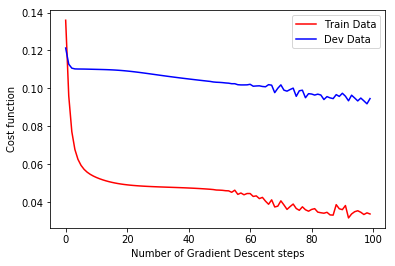

In [58]:
## (1) Parameters 
# Get number of features
num_features = train_X.shape[1]
# Then get the number of keypoints from labels
num_labels = train_y.shape[1]
np.random.seed(0) # Setting random seed

# Initialize the weights to small, but non-zero, values.
# N(mu,sigma^2) --> sigma * np.random.randn() + mu
# each column is weight set for one output (y1), so total 30 columns for y1, y2...y30
w3 = theano.shared(np.asarray((np.random.randn(*(num_features, num_labels))*.01))) 

## (2) Model
# Theano objects accessed with standard Python variables
X3 = T.matrix()
Y3 = T.matrix()

# Tanh Activation function
def model3(X3, w3): 
    return T.tanh(T.dot(X3, w3))
      
y_hat3 = model3(X3, w3)

## (3) Cost function
cost3 = T.sqrt(T.mean((Y3 - y_hat3)**2))

## (4) Objective (and solver)
alpha3 = 0.001 # Learning Rate
gradient3 = T.grad(cost=cost3, wrt=w3) 
update3 = [[w3, w3 - gradient3 * alpha3]] 
train3 = theano.function(inputs=[X3, Y3], outputs=cost3, updates=update3, allow_input_downcast=True) # computes cost, then runs update
predict3 = theano.function(inputs=[X3], outputs=y_hat3, allow_input_downcast=True) # dtype np.float64 and your variable is instantiated to have dtype np.float32, the input is converted to np.float32 when the flag is set to True.

miniBatchSize = 1  # mini batch of 1 is stochastic descent
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):       
        for start, end in zip(range(0, len(train_X), miniBatchSize), range(miniBatchSize, len(train_X), miniBatchSize)):
            cost3 = train3(train_X[start:end], train_y[start:end])
        cost_vec.append(cost3)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict3(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('epoch#, RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
    
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
    
gradientDescentStochastic(100)

With stochastic gradient descent, the RMSE is further reduced. The RMSE for dev data is 0.095 within 100 Epochs. Using Stochastic descent allows the model to come closer to a global miminum, thus improving the prediction accuracy.  

However, updates are much more frequent with stochasitc gradient descent - for each epoch, the weights are updated 1842 times, thus increasing the  computation time. Additionally, because the weights are updated more frequently, the cost fluctuates more with each epoch. 

In order to balance computation time and maintain accuracy, mini batch is applied below.

### A4) Single Layer Neural Network with tanh activation function and mini batch gradient descent

Data: train_X --> original data with full labels

* model: single layer neural network with tanh activation function
* cost function: RMSE
* Objective: minimize RMSE
* Methodology: mini-batch gradient descent
   * Learning Rate: 0.001

epoch #, RMSE (1, 0.1402621154224962)
epoch #, RMSE (2, 0.13072881586428955)
epoch #, RMSE (3, 0.12496246912452383)
epoch #, RMSE (4, 0.12077691778793784)
epoch #, RMSE (5, 0.11748429737717864)
epoch #, RMSE (6, 0.1147744051063851)
epoch #, RMSE (7, 0.11247925308556034)
epoch #, RMSE (8, 0.11049678360694547)
epoch #, RMSE (9, 0.10875966874309557)
epoch #, RMSE (10, 0.10722061964176315)
epoch #, RMSE (11, 0.10584480314871322)
epoch #, RMSE (12, 0.10460563171571509)
epoch #, RMSE (13, 0.10348226669196327)
epoch #, RMSE (14, 0.10245804497760148)
epoch #, RMSE (15, 0.10151943321766074)
epoch #, RMSE (16, 0.10065530117706287)
epoch #, RMSE (17, 0.09985639873570368)
epoch #, RMSE (18, 0.09911496887558537)
epoch #, RMSE (19, 0.09842445499662734)
epoch #, RMSE (20, 0.09777927568933796)
epoch #, RMSE (21, 0.09717464894385984)
epoch #, RMSE (22, 0.09660645331370732)
epoch #, RMSE (23, 0.096071117155445)
epoch #, RMSE (24, 0.09556552948767878)
epoch #, RMSE (25, 0.09508696768713902)
epoch #, RMSE

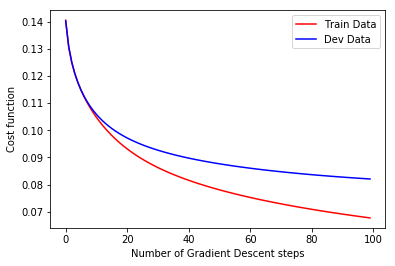

In [59]:
## (1) Parameters 
# Get number of features
num_features = train_X.shape[1]
# Then get the number of keypoints from labels
num_labels = train_y.shape[1]
np.random.seed(0) # Setting random seed

# Initialize the weights to small, but non-zero, values.
# N(mu,sigma^2) --> sigma * np.random.randn() + mu
# each column is weight set for one output (y1), so total 30 columns for y1, y2...y30
w4 = theano.shared(np.asarray((np.random.randn(*(num_features, num_labels))*.01))) 

## (2) Model
# Theano objects accessed with standard Python variables
X4 = T.matrix()
Y4 = T.matrix()

# Tanh activation function
def model4(X4, w4): 
    return T.tanh(T.dot(X4, w4))
    
y_hat4 = model4(X4, w4)

## (3) Cost function
cost4 = T.sqrt(T.mean((Y4 - y_hat4)**2))

## (4) Objective (and solver)
alpha4 = 0.001 # Learning Rate
gradient4 = T.grad(cost=cost4, wrt=w4) 
update4 = [[w4, w4 - gradient4 * alpha4]] 
train4 = theano.function(inputs=[X4, Y4], outputs=cost4, updates=update4, allow_input_downcast=True) # computes cost, then runs update
predict4 = theano.function(inputs=[X4], outputs=y_hat4, allow_input_downcast=True) # dtype np.float64 and your variable is instantiated to have dtype np.float32, the input is converted to np.float32 when the flag is set to True.

miniBatchSize = 10 
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):       
        for start, end in zip(range(0, len(train_X), miniBatchSize), range(miniBatchSize, len(train_X), miniBatchSize)):
            cost4 = train4(train_X[start:end], train_y[start:end])
        cost_vec.append(cost4)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE=np.sqrt(mean_squared_error(dev_y, predict4(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('epoch #, RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
    
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
    
gradientDescentStochastic(100)

With mini-batch gradient descent, the RMSE is further reduced. The RMSE for dev data is 0.08 with 100 Epochs. Instead of updating weights with each training data and total 1840 updates in each epoch, the weights are updated with 10 training data in one group and total 184 updates in each epoch, which saves computation time and maintains high accuracy.

### Part A Conclusion: Single Layer Neural Network (Perceptron)

The optimum settings for a single layer neural network presented here, to achieve the highest accuracy (RMSE = 0.08) training on the original, unmodified, data set are:

*   Model: Single Layer Neural Network with Tanh Activation Function
*   Cost Function: RMSE (root mean square error)
*   Objective: RMSE Minimization with Gradient Descent Method
*   Gradient Descent Method: Mini-Batch Gradient Descent Method
    * Learning Rate: 0.001
    * Batch Size: 10
    * Epochs: 100 (trade off between computation time and accuracy)

With the 'optimum' settings, we can see that the accuracy for each label varies, following are the RMSE values for each of the 30 keypoint x and y values.

In [60]:
 pd.DataFrame(
     np.sqrt(mean_squared_error(dev_y, 
                                predict4(dev_X), 
                                multioutput='raw_values')),
     columns=['RMSE'], 
     index=dev_labels
 ).sort_values('RMSE', ascending=False)

,RMSE
mouth_center_bottom_lip_y,0.109012
mouth_left_corner_y,0.101146
mouth_center_top_lip_y,0.098347
left_eyebrow_outer_end_x,0.097536
mouth_right_corner_y,0.097328
right_eyebrow_outer_end_x,0.093797
right_eyebrow_outer_end_y,0.093500
right_eye_outer_corner_x,0.092590
left_eye_outer_corner_x,0.090157
left_eyebrow_outer_end_y,0.089518


Reviewing the scores of the predictions on the development data, we can see by observation in the histogram of scores that the majority of the development predictions score better than 0.10:

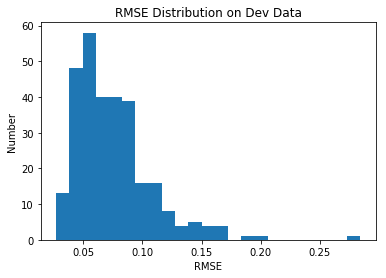

In [68]:
## RMSE by sample
RMSE_1 = []
dev_y_pred = predict4(dev_X)
for i in range(len(dev_y)):
    RMSE_ = (score(dev_y[i], dev_y_pred[i]))
    RMSE_1.append([i, RMSE_]) # list of lists of form [index, rmse]
RMSE_1.sort(key=lambda x: x[1]) # sort from best accuracy to worst
# print(RMSE_1[0:5])
plt.hist([n[1] for n in RMSE_1], bins='auto')
plt.title('RMSE Distribution on Dev Data')
plt.xlabel('RMSE')
plt.ylabel("Number")
plt.show()

As a further step to determining sources of error, we look at some images that have high predicition accuracy and some that have low accuracy.

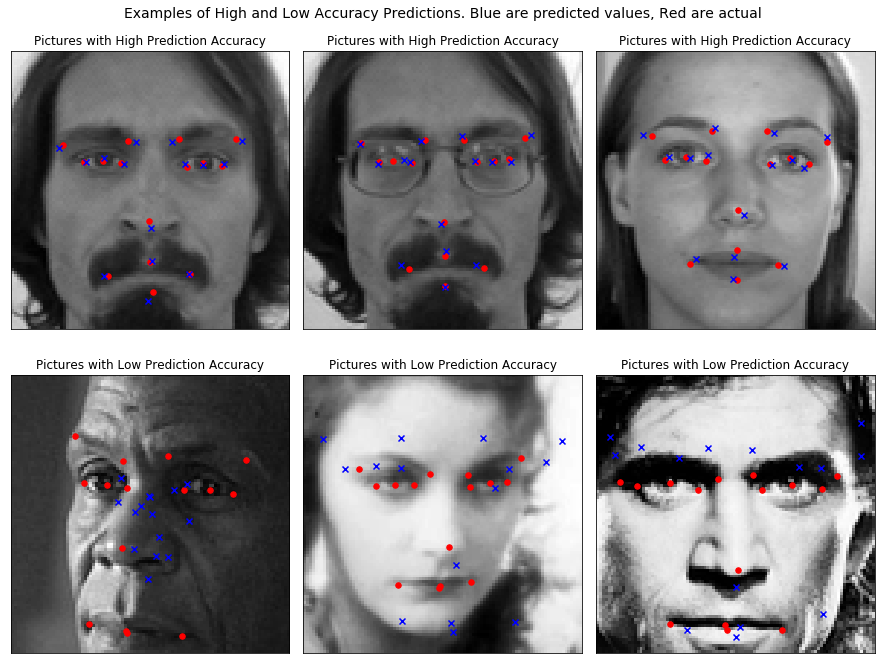

In [103]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=-0.4, wspace=0.05)

fig.suptitle("Examples of High and Low Accuracy Predictions. Blue are predicted values, Red are actual",y=0.9, fontsize=14)

for n in range(1, 4):
    ax = fig.add_subplot(2, 3, n, xticks=[], yticks=[])
    #print(RMSE_1[n-1][0], RMSE_1[n-1][1])
    plot_example(dev_X[RMSE_1[n-1][0]], dev_y[RMSE_1[n-1][0]], ax, dev_y_pred[RMSE_1[n-1][0]])
    plt.title('Pictures with High Prediction Accuracy')

for n in range(1, 4):
    ax1 = fig.add_subplot(2, 3, n+3, xticks=[], yticks=[])
    #print(RMSE_1[n*-1][0], RMSE_1[n*-1][1])
    plot_example(dev_X[RMSE_1[n*-1][0]], dev_y[RMSE_1[n*-1][0]], ax1, dev_y_pred[RMSE_1[n*-1][0]])
    plt.title('Pictures with Low Prediction Accuracy')
plt.show()

In summary, the performance of the single layer (perceptron) model:
*  The average RMSE for all keypoints is 0.08 for Dev data
*  Using linear regression, RMSE for each keypoint pair significantly increases (worse accuracy)
*  Based on histogram of RMSE for all Dev data, the median value of RMSE of prediction is 0.05 for Dev data.
*  The photos with the best and worst RMSE shown above indicate that faces that are 'not normal' have lower accuracy - faces turned to the side, faces that begin blurry, faces with exceptionally high contrast - these are harder to accurately predict as might be expected.

## B) Multilayer Neural Network
### Following methodology is applied to improve performance of multi-layer neural network:

We will use the optimal learning rate, activation function and gradient descent method based on what was discovered using the single-layer neural network developed in part A) :
* Learning rate:  0.001
* Activation Function: tanh function (for output layer)
* Gradient Descent: mini-batch with batch size of 10

For the hidden layers, we will investigate the following aspects to determine if they result in better prediction performance:
* number of hidden nodes: 600 and 800
* number of hidden layers: 1 and 3
* Activation Function: Rectifier Activation Function

### B1) Multi-Layer Neural Network with tanh activation function and mini batch gradient descent

Data: train_X --> original data with full labels

* model: Multilayer layer neural network with tanh activation function
  * one hidden-layer
  * 600 hidden nodes
  * Activation Function: tanh
* cost function: RMSE
* Objective: minimize RMSE
* Methodology: mini-batch gradient descent
   * Learning Rate: 0.001
   * Mini Batch size = 10

RMSE (1, 0.08995309090362977)
RMSE (2, 0.08702498828806424)
RMSE (3, 0.08455345552569263)
RMSE (4, 0.08224807616000607)
RMSE (5, 0.08008821850387535)
RMSE (6, 0.07807006637979556)
RMSE (7, 0.07619513049796384)
RMSE (8, 0.07446475033361741)
RMSE (9, 0.07287782635277958)
RMSE (10, 0.071430407435023)
RMSE (11, 0.0701161002676945)
RMSE (12, 0.06892671958497987)
RMSE (13, 0.06785293043315722)
RMSE (14, 0.06688480496540525)
RMSE (15, 0.06601227800386739)
RMSE (16, 0.06522550086991415)
RMSE (17, 0.0645150980146201)
RMSE (18, 0.06387233597212838)
RMSE (19, 0.06328921849847224)
RMSE (20, 0.06275852384691669)
RMSE (21, 0.0622737998241535)
RMSE (22, 0.06182933034084954)
RMSE (23, 0.0614200845141258)
RMSE (24, 0.06104165665923043)
RMSE (25, 0.06069020309170681)
RMSE (26, 0.060362379697073705)
RMSE (27, 0.06005528272615091)
RMSE (28, 0.059766394188013904)
RMSE (29, 0.059493532462077496)
RMSE (30, 0.059234808257410045)
RMSE (31, 0.05898858574178326)
RMSE (32, 0.0587534484889784)
RMSE (33, 0.05852816

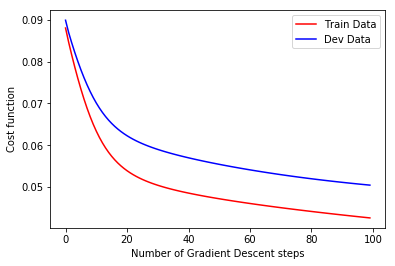

In [105]:
## (1) Parameters
# Get number of features
num_features = train_X.shape[1]
# Then get the number of keypoints from labels
num_labels = train_y.shape[1]
np.random.seed(0)
numHiddenNodes = 600 
w5_1 = theano.shared(np.asarray((np.random.randn(*(num_features, numHiddenNodes))*.01)))
w5_2 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes, num_labels))*.01)))
params5 = [w5_1, w5_2]


## (2) Model
X5 = T.matrix()
Y5 = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Second, activation is tanh for hidden and visible layers
def model5(X5, w5_1, w5_2):
    return T.tanh(T.dot(T.tanh(T.dot(X5, w5_1)), w5_2))
y_hat5 = model5(X5, w5_1, w5_2)


## (3) Cost is RMSE
cost5 = T.sqrt(T.mean((Y5 - y_hat5)**2))

## (4) Minimization.  Update rule changes to backpropagation.
alpha5 = 0.001
def backprop(cost, w):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        updates.append([w1, w1 - grad * alpha5])
    return updates
update5 = backprop(cost5, params5)
train5 = theano.function(inputs=[X5, Y5], outputs=cost5, updates=update5, allow_input_downcast=True)
predict5 = theano.function(inputs=[X5], outputs=y_hat5, allow_input_downcast=True)

miniBatchSize = 10
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):
        for start, end in zip(range(0, len(train_X), miniBatchSize), range(miniBatchSize, len(train_X), miniBatchSize)):
            cost5 = train5(train_X[start:end], train_y[start:end])
        cost_vec.append(cost5)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict5(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
        
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
gradientDescentStochastic(100)

The RMSE is reduced to 0.05 when we move from a single layer to a multi-layer neural network. By adding one hidden layer, the model performance is improved and is now on par with the kNN performance. In the next step, we add more nodes in the hidden layer and then increase the number of hidden layers.

### B2) Multi-Layer Neural Network with tanh activation function and mini gradient descent (Increased number of hidden nodes)
Data: train_X --> original data with full labels
* model: Multilayer layer neural network with tanh activation function
  * one hidden-layer
  * increase hidden nodes to 800
  * Activation Function: tanh
* cost function: RMSE
* Objective: minimize RMSE
* Methodology: mini-batch gradient descent
   * Learning Rate: 0.001
   * Mini-Batch size = 10

RMSE (1, 0.0923894154753882)
RMSE (2, 0.08923918010426024)
RMSE (3, 0.08644770530322338)
RMSE (4, 0.08385743147588157)
RMSE (5, 0.08142685164158335)
RMSE (6, 0.07914567076793519)
RMSE (7, 0.07701671441120816)
RMSE (8, 0.07504597948070249)
RMSE (9, 0.07323760978178122)
RMSE (10, 0.07159184782843216)
RMSE (11, 0.07010468345212796)
RMSE (12, 0.06876839577346787)
RMSE (13, 0.06757249383055002)
RMSE (14, 0.06650475332340818)
RMSE (15, 0.06555217050006554)
RMSE (16, 0.06470173903273804)
RMSE (17, 0.06394101648173804)
RMSE (18, 0.06325848852713221)
RMSE (19, 0.06264376320279445)
RMSE (20, 0.06208763666025556)
RMSE (21, 0.06158207100193367)
RMSE (22, 0.0611201182048583)
RMSE (23, 0.06069581581565326)
RMSE (24, 0.06030407218523642)
RMSE (25, 0.05994055254624269)
RMSE (26, 0.05960157244478144)
RMSE (27, 0.05928400174556978)
RMSE (28, 0.05898518031569941)
RMSE (29, 0.0587028452309379)
RMSE (30, 0.05843506866553083)
RMSE (31, 0.058180205314762104)
RMSE (32, 0.05793684811282369)
RMSE (33, 0.0577037

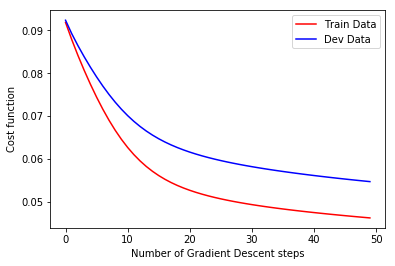

In [125]:
## (1) Parameters
# Get number of features
num_features = train_X.shape[1]
# Then get the number of keypoints from labels
num_labels = train_y.shape[1]
np.random.seed(0)

numHiddenNodes_high = 800 
w5_1 = theano.shared(np.asarray((np.random.randn(*(num_features, numHiddenNodes_high))*.01)))
w5_2 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes_high, num_labels))*.01)))
params5 = [w5_1, w5_2]


## (2) Model
X5 = T.matrix()
Y5 = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Activation on both layers is tanh
def model5(X5, w5_1, w5_2):
    return T.tanh(T.dot(T.tanh(T.dot(X5, w5_1)), w5_2))
y_hat5 = model5(X5, w5_1, w5_2)


## (3) Cost is RMSE
cost5 = T.sqrt(T.mean((Y5 - y_hat5)**2))

## (4) Minimization.  Update rule changes to backpropagation.
alpha5 = 0.001
def backprop(cost, w):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        updates.append([w1, w1 - grad * alpha5])
    return updates
update5 = backprop(cost5, params5)
train5 = theano.function(inputs=[X5, Y5], outputs=cost5, updates=update5, allow_input_downcast=True)
predict5 = theano.function(inputs=[X5], outputs=y_hat5, allow_input_downcast=True)

miniBatchSize = 10
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):
        for start, end in zip(range(0, len(train_X), miniBatchSize), range(miniBatchSize, len(train_X), miniBatchSize)):
            cost5 = train5(train_X[start:end], train_y[start:end])
        cost_vec.append(cost5)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict5(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
        
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
gradientDescentStochastic(50)

The model performance was not improved (comparing the 50th epoch) by increasing the number of hidden nodes, however the training time is longer. In order to save computational time, the following models will use 600 hidden nodes

### B3) Multi-Layer Neural Network with rectifier activation function in hidden layer and mini batch gradient descent 
This is the same model as in B1, however, here we use a rectifier activation function in the hidden layer. Rectifier is chosen for this layer because the rectifier activated node will continue to learn in the positive direction,  while the learning will stop when the tanh activated node approaches 1.  

Data: train_X --> original data with full labels
* model: Multilayer layer neural network
  * one hidden-layer
  * 600 hidden nodes
  * Activation Function: tanh in output layer and rectifier function in hidden layer
* cost function: RMSE
* Objective: minimize RMSE
* Methodology: mini-batch gradient descent
   * Learning Rate: 0.001
   * Mini-batch size

RMSE (1, 0.10402555322071727)
RMSE (2, 0.10249151796279063)
RMSE (3, 0.1016512285375318)
RMSE (4, 0.1009049841425342)
RMSE (5, 0.10022777104496074)
RMSE (6, 0.09960583582299366)
RMSE (7, 0.0990313409696317)
RMSE (8, 0.09849173556684898)
RMSE (9, 0.09798034229427048)
RMSE (10, 0.097493593313912)
RMSE (11, 0.09702825368119859)
RMSE (12, 0.09657398041605786)
RMSE (13, 0.09613127243854615)
RMSE (14, 0.09570317751687483)
RMSE (15, 0.09528591516379988)
RMSE (16, 0.09488016217999222)
RMSE (17, 0.09448260435110342)
RMSE (18, 0.09409503347663381)
RMSE (19, 0.0937156989997527)
RMSE (20, 0.09334339339058481)
RMSE (21, 0.09297457185891528)
RMSE (22, 0.09261246719036886)
RMSE (23, 0.0922562196333759)
RMSE (24, 0.09190786600096025)
RMSE (25, 0.09156490765717072)
RMSE (26, 0.0912233275533523)
RMSE (27, 0.09088880438942284)
RMSE (28, 0.09055670000386049)
RMSE (29, 0.09022685730009553)
RMSE (30, 0.08990191336938734)
RMSE (31, 0.08958181696313246)
RMSE (32, 0.08926496895322841)
RMSE (33, 0.0889538018753

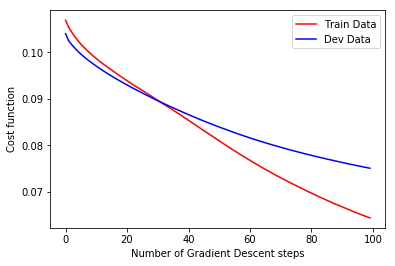

In [127]:
np.random.seed(0)

## (1) Parameters
numHiddenNodes = 600 
w6_1 = theano.shared(np.asarray((np.random.randn(*(num_features, numHiddenNodes))*.01)))
w6_2 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes, num_labels))*.01)))
params6 = [w6_1, w6_2]


## (2) Model
X6 = T.matrix()
Y6 = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Second, activation on the hidden layer uses rectifier (relu) and tanh on the output layer
def model6(X6, w6_1, w6_2):
    return T.tanh(T.dot(T.nnet.relu(T.dot(X6, w6_1), 0), w6_2))
y_hat6 = model6(X6, w6_1, w6_2)


## (3) Cost is RMSE
cost6 = T.sqrt(T.mean((Y6 - y_hat6)**2))

## (4) Minimization.  Update rule changes to backpropagation.
alpha6 = 0.001
def backprop(cost, w):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        updates.append([w1, w1 - grad * alpha6])
    return updates
update6 = backprop(cost6, params6)
train6 = theano.function(inputs=[X6, Y6], outputs=cost6, updates=update6, allow_input_downcast=True)
predict6 = theano.function(inputs=[X6], outputs=y_hat6, allow_input_downcast=True)

miniBatchSize = 10
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):
        for start, end in zip(range(0, len(train_X), miniBatchSize), range(miniBatchSize, len(train_X), miniBatchSize)):
            cost6 = train6(train_X[start:end], train_y[start:end])
        cost_vec.append(cost6)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict6(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
        
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
gradientDescentStochastic(100)

Comparing this to B1, we note that there is no improvement by using the rectifier function in hidden layer (vs. the tanh function). In fact, performance is worse at the 100th epoch mark, although it might eventually improve further, it would take many more iterations and as can be seen, the performance on the Dev data is beginning to flatten out.

### B2) Multi-Layer Neural Network with tanh activation function and mini batch gradient descent - add hidden layers  

Data: train_X --> original data with full labels
* model: Multilayer layer neural network with tanh activation function
  * three hidden-layers
  * 600 hidden nodes
  * Activation Functions: tanh
* cost function: RMSE
* Objective: minimize RMSE
* Methodology: mini-batch gradient descent
   * Learning Rate: 0.001
   * Mini-batch size = 10

RMSE (1, 0.301320210354042)
RMSE (2, 0.1422285618585317)
RMSE (3, 0.0872190001332823)
RMSE (4, 0.08578498043254512)
RMSE (5, 0.08456669220066979)
RMSE (6, 0.08341021525662821)
RMSE (7, 0.08231266257197906)
RMSE (8, 0.08127161558352641)
RMSE (9, 0.0802842672487393)
RMSE (10, 0.07934761189697542)
RMSE (11, 0.07845859066562269)
RMSE (12, 0.07761419107979016)
RMSE (13, 0.07681151208910764)
RMSE (14, 0.07604780411742842)
RMSE (15, 0.07532049153563478)
RMSE (16, 0.07462718303302616)
RMSE (17, 0.07396567380109871)
RMSE (18, 0.07333394225934807)
RMSE (19, 0.07273014319126973)
RMSE (20, 0.07215259855390115)
RMSE (21, 0.07159978681572733)
RMSE (22, 0.0710703314139447)
RMSE (23, 0.07056298875883006)
RMSE (24, 0.07007663611299424)
RMSE (25, 0.0696102596071342)
RMSE (26, 0.06916294260131903)
RMSE (27, 0.06873385455135522)
RMSE (28, 0.0683222404910649)
RMSE (29, 0.06792741119618269)
RMSE (30, 0.06754873405841492)
RMSE (31, 0.06718562467221986)
RMSE (32, 0.06683753912276956)
RMSE (33, 0.0665039669595

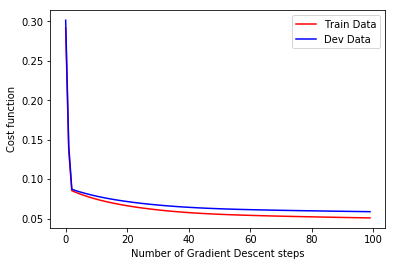

In [128]:
np.random.seed(0)
## (1) Parameters
numHiddenNodes = 600 
w7_1 = theano.shared(np.asarray((np.random.randn(*(num_features, numHiddenNodes))*.01)))
w7_2 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes, numHiddenNodes))*.01)))
w7_3 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes, num_labels))*.01)))
params7 = [w7_1, w7_2,w7_3]


## (2) Model
X7 = T.matrix()
Y7 = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Second, activation on all layers is tanh
def model7(X7, w7_1, w7_2, w7_3):
    return T.dot(T.tanh(T.dot(T.tanh(T.dot(X7, w7_1)), w7_2)),w7_3)
y_hat7 = model7(X7, w7_1, w7_2, w7_3)


## (3) Cost is RMSE
cost7 = T.sqrt(T.mean((Y7 - y_hat7)**2))

## (4) Minimization.  Update rule changes to backpropagation.
alpha7 = 0.001
def backprop(cost, w):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        updates.append([w1, w1 - grad * alpha7])
    return updates
update7 = backprop(cost7, params7)
train7 = theano.function(inputs=[X7, Y7], outputs=cost7, updates=update7, allow_input_downcast=True)
predict7 = theano.function(inputs=[X7], outputs=y_hat7, allow_input_downcast=True)

miniBatchSize = 10
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):
        for start, end in zip(range(0, len(train_X), miniBatchSize), range(miniBatchSize, len(train_X), miniBatchSize)):
            cost7 = train7(train_X[start:end], train_y[start:end])
        cost_vec.append(cost7)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict7(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
        
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
gradientDescentStochastic(100)


Adding the extra hidden layer does not increase final accuracy over that found in 1 hidden layer, and takes longer to solve, thus there is no benefit to the extra hidden layer.


### Part B Conclusion: Multi-Layer Neural Network
Based on the RMSE of the above multi-layer model variations, the conclusion is that the optimal model is number 5 shown in section B1:
*   Model:Multi-Layer Neural Network 
    * Tanh Activation Function
    * 600 hidden nodes
    * 1 hidden layer
*   Cost Function: RMSE (root mean square error)
*   Objective: RMSE Minimization with Gradient Descent Method
*   Gradient Descent Method: Mini-Batch Gradient Descent Method
    * Learning Rate: 0.001
    * Batch Size: 10
    * Epochs: 50 (trade off between computation time and accuracy)
 
Viewing the data from the model in B2 below we see that:
*  The average RMSE for all keypoints is 0.056 for Dev data
*  Compared with linear regression and the single-layer neural network, RMSE for each keypoint pair improves
*  Reviewing the histogram below of RMSE for all Dev data, the RMSE of centre of the RMSE is 0.03 for most Dev data (compared with 0.05 for the single layer model)
*  Again, the images with highest and lowest RMSE are shown below. It is obvious that when the picture is not centered, the model performance will decrease. When image shows side faces, the model loses accuracy for prediction for the keypoints that are hidden in the image. This is where a sliding scale of accuracy might be appropriate - i.e. only counting scores for those labels that are 'visible' in the image.

In [129]:
 pd.DataFrame(
     np.sqrt(mean_squared_error(dev_y, 
                                predict5(dev_X), 
                                multioutput='raw_values')),
     columns=['RMSE'], index=dev_labels
 ).sort_values('RMSE', ascending=False)

,RMSE
mouth_center_bottom_lip_y,0.091437
mouth_left_corner_y,0.075947
mouth_center_top_lip_y,0.075265
mouth_right_corner_y,0.074756
nose_tip_y,0.073622
right_eyebrow_outer_end_y,0.064677
left_eyebrow_outer_end_y,0.060809
right_eyebrow_outer_end_x,0.058822
left_eyebrow_outer_end_x,0.058526
mouth_left_corner_x,0.058063


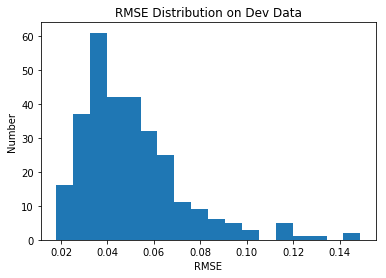

In [132]:
## RMSE by sample
RMSE_1 = []
dev_y_pred5 = predict5(dev_X)
for i in range(len(dev_y)):
    RMSE_ = (score(dev_y[i], dev_y_pred5[i]))
    RMSE_1.append([i, RMSE_]) # list of lists of form [index, rmse]
RMSE_1.sort(key=lambda x: x[1])
#print(RMSE_1[0:5])
plt.hist([n[1] for n in RMSE_1], bins='auto')
plt.title('RMSE Distribution on Dev Data')
plt.xlabel('RMSE')
plt.ylabel("Number")
plt.show()

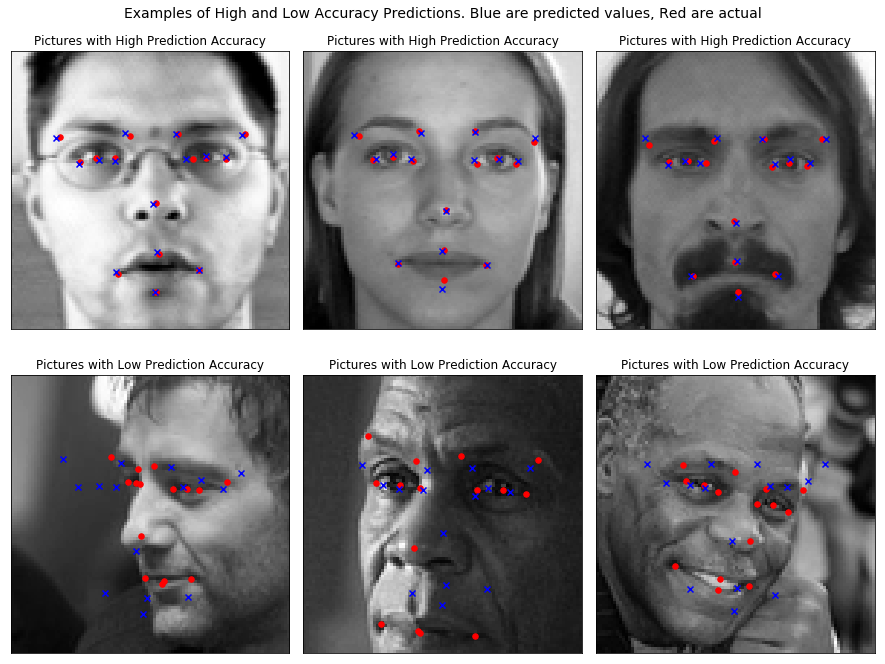

In [134]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=-0.4, wspace=0.05)

fig.suptitle("Examples of High and Low Accuracy Predictions. Blue are predicted values, Red are actual",y=0.9, fontsize=14)


for n in range(1, 4):
    ax = fig.add_subplot(2, 3, n, xticks=[], yticks=[])
    #print(RMSE_1[n-1][0], RMSE_1[n-1][1])
    plot_example(dev_X[RMSE_1[n-1][0]], dev_y[RMSE_1[n-1][0]], ax, dev_y_pred5[RMSE_1[n-1][0]])
    plt.title('Pictures with High Prediction Accuracy')
for n in range(1, 4):
    ax1 = fig.add_subplot(2, 3, n+3, xticks=[], yticks=[])
    #print(RMSE_1[n*-1][0], RMSE_1[n*-1][1])
    plot_example(dev_X[RMSE_1[n*-1][0]], dev_y[RMSE_1[n*-1][0]], ax1, dev_y_pred5[RMSE_1[n*-1][0]])
    plt.title('Pictures with Low Prediction Accuracy')

plt.show()

## C) Improvement of Multilayer Neural Network with Modified Training Data
In order to try to improve accuracy of prediction, we will use the data that has been feature engineered in Section III

### Following training data is applied to improve performance of multi-layer neural network:
* Combination of Flipped and Original Train Data (more_data)
* Accentuated Original Train Data
* Blurred Original Train Data

### Use the optimal learning rate, activation function and gradient descent method as determined in Section B above

* Model: Multi-layer Neural Network
  * Number of Hidden Nodes: 600
  * Hidden Layer: 1
* Activation Function: tanh function 
* Cost Function: RMSE
  * Objective: Minimize RMSE
  * Mehod: Gradient Descent Method
      * mini-batch with batch size of 10
      * Learning Rate: 0.001



### C1) Combination of train data and flipped train data

RMSE (1, 0.08753379097377981)
RMSE (2, 0.08290672397338272)
RMSE (3, 0.07883989046022134)
RMSE (4, 0.07532182649069002)
RMSE (5, 0.07235643602132437)
RMSE (6, 0.06990627557775778)
RMSE (7, 0.0679050270560864)
RMSE (8, 0.066276082058963)
RMSE (9, 0.06494516162478302)
RMSE (10, 0.06384725504833176)
RMSE (11, 0.06292910573208559)
RMSE (12, 0.06214887279027505)
RMSE (13, 0.06147448477886048)
RMSE (14, 0.06088167519214004)
RMSE (15, 0.060352182399741175)
RMSE (16, 0.059872276277966666)
RMSE (17, 0.059431617835054795)
RMSE (18, 0.059022400645208535)
RMSE (19, 0.058638712278104056)
RMSE (20, 0.05827606103171693)
RMSE (21, 0.057931024749282224)
RMSE (22, 0.057600989253706596)
RMSE (23, 0.0572839525718614)
RMSE (24, 0.056978377627915584)
RMSE (25, 0.05668308084033568)
RMSE (26, 0.05639714748524851)
RMSE (27, 0.056119867147702465)
RMSE (28, 0.055850684346344284)
RMSE (29, 0.05558916068715231)
RMSE (30, 0.05533494582213498)
RMSE (31, 0.055087755161219276)
RMSE (32, 0.054847352781438576)
RMSE (33,

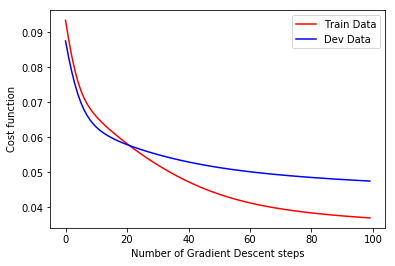

In [135]:
np.random.seed(0)
## (1) Parameters
# Get number of features
num_features1 = more_data.shape[1]
# Then get the number of keypoints from labels
num_labels1 = more_labels.shape[1]

numHiddenNodes_high = 600 
w8_1 = theano.shared(np.asarray((np.random.randn(*(num_features1, numHiddenNodes_high))*.01)))
w8_2 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes_high, num_labels1))*.01)))
params8 = [w8_1, w8_2]


## (2) Model
X8 = T.matrix()
Y8 = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Second, activation on output and hidden layers are both tanh
def model8(X8, w8_1, w8_2):
    return T.tanh(T.dot(T.tanh(T.dot(X8, w8_1)), w8_2))
y_hat8 = model8(X8, w8_1, w8_2)


## (3) Cost is RMSE
cost8 = T.sqrt(T.mean((Y8 - y_hat8)**2))

## (4) Minimization.  Update rule changes to backpropagation.
alpha8 = 0.001
def backprop(cost, w):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        updates.append([w1, w1 - grad * alpha8])
    return updates
update8 = backprop(cost8, params8)
train8 = theano.function(inputs=[X8, Y8], outputs=cost8, updates=update8, allow_input_downcast=True)
predict8 = theano.function(inputs=[X8], outputs=y_hat8, allow_input_downcast=True)

miniBatchSize = 10
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):
        for start, end in zip(range(0, len(more_data), miniBatchSize), range(miniBatchSize, len(more_data), miniBatchSize)):
            cost8 = train8(more_data[start:end], more_labels[start:end])
        cost_vec.append(cost8)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict8(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
        
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
gradientDescentStochastic(100)

By adding additional training data (effectively doubling the data), we have slightly improved the accuracy of prediction.

### C2) Accentuated Data 
Data that has had the differences between light and dark accentuated. Same model as in B1.
We are only using the original training data set, not the set including flipped images, in order to do comparisons later.

RMSE (1, 0.09151028418556756)
RMSE (2, 0.08754884263424181)
RMSE (3, 0.08466830739172303)
RMSE (4, 0.0820424487883169)
RMSE (5, 0.07962166530577885)
RMSE (6, 0.07740055264686252)
RMSE (7, 0.07537922148444465)
RMSE (8, 0.07355406814154299)
RMSE (9, 0.07191623422634877)
RMSE (10, 0.0704527305646707)
RMSE (11, 0.06914809781351425)
RMSE (12, 0.06798587145143425)
RMSE (13, 0.06694967915727591)
RMSE (14, 0.06602397690022249)
RMSE (15, 0.06519448367783205)
RMSE (16, 0.06444838819709493)
RMSE (17, 0.06377439680736785)
RMSE (18, 0.06316268009549174)
RMSE (19, 0.06260476149524277)
RMSE (20, 0.06209337829134)
RMSE (21, 0.06162233488332221)
RMSE (22, 0.06118636034952415)
RMSE (23, 0.060780976897839054)
RMSE (24, 0.06040238220317243)
RMSE (25, 0.06004734640860078)
RMSE (26, 0.05971312328548011)
RMSE (27, 0.059397374383579296)
RMSE (28, 0.05909810472355313)
RMSE (29, 0.05881360853238558)
RMSE (30, 0.05854242359471878)
RMSE (31, 0.05828329292511756)
RMSE (32, 0.05803513262037732)
RMSE (33, 0.05779700

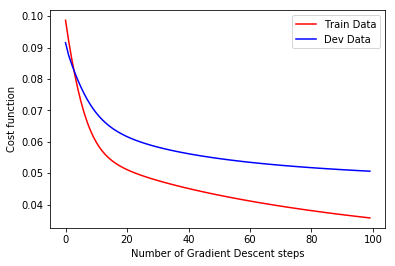

In [136]:
np.random.seed(0)
## (1) Parameters
# Get number of features
num_features1 = accentuated.shape[1]
# Then get the number of keypoints from labels
num_labels1 = train_y.shape[1]

numHiddenNodes_high = 600 
w9_1 = theano.shared(np.asarray((np.random.randn(*(num_features1, numHiddenNodes_high))*.01)))
w9_2 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes_high, num_labels1))*.01)))
params9 = [w9_1, w9_2]


## (2) Model
X9 = T.matrix()
Y9 = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Second, activation on both layers is tanh
def model9(X9, w9_1, w9_2):
    return T.tanh(T.dot(T.tanh(T.dot(X9, w9_1)), w9_2))
y_hat9 = model9(X9, w9_1, w9_2)


## (3) Cost is RMSE
cost9 = T.sqrt(T.mean((Y9 - y_hat9)**2))

## (4) Minimization.  Update rule changes to backpropagation.
alpha9 = 0.001
def backprop(cost, w):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        updates.append([w1, w1 - grad * alpha9])
    return updates
update9 = backprop(cost9, params9)
train9 = theano.function(inputs=[X9, Y9], outputs=cost9, updates=update9, allow_input_downcast=True)
predict9 = theano.function(inputs=[X9], outputs=y_hat9, allow_input_downcast=True)

miniBatchSize = 10
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):
        for start, end in zip(range(0, len(accentuated), miniBatchSize), range(miniBatchSize, len(accentuated), miniBatchSize)):
            cost9 = train9(accentuated[start:end], train_y[start:end])
        cost_vec.append(cost9)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict9(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
        
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
gradientDescentStochastic(100)

Comparing the accentuated data with the original data (e.g. this model versus B1), we see there is no real difference in accuracy  - RMSE in B1 is 0.0504 and RMSE here is 0.0506 after 100 epochs, thus we can conclude that accentuating the data does not improve outcomes, which is similar to what was seen in sections III and IV.

### C2-1) Accentuated Data with Flipped Images
Now add the additional flipped images with accentuation to the training data

RMSE (1, 0.08714829705570132)
RMSE (2, 0.08179157597670561)
RMSE (3, 0.0773109225190336)
RMSE (4, 0.07361840876933712)
RMSE (5, 0.07065404464536806)
RMSE (6, 0.06830538178807642)
RMSE (7, 0.06644340922123372)
RMSE (8, 0.06495091137836013)
RMSE (9, 0.0637335080433998)
RMSE (10, 0.06272004206449458)
RMSE (11, 0.061858642171653225)
RMSE (12, 0.06111202970680168)
RMSE (13, 0.060453481590586236)
RMSE (14, 0.059863759040840264)
RMSE (15, 0.059328896845760946)
RMSE (16, 0.05883865062087455)
RMSE (17, 0.058385415485725844)
RMSE (18, 0.05796347285577494)
RMSE (19, 0.05756846310538438)
RMSE (20, 0.0571970135836163)
RMSE (21, 0.056846474058927975)
RMSE (22, 0.05651472712325418)
RMSE (23, 0.05620005143102471)
RMSE (24, 0.05590102251930998)
RMSE (25, 0.05561644054454279)
RMSE (26, 0.05534527738930095)
RMSE (27, 0.05508663775713666)
RMSE (28, 0.054839730402931594)
RMSE (29, 0.05460384673727651)
RMSE (30, 0.054378344822904365)
RMSE (31, 0.05416263733674355)
RMSE (32, 0.05395618246588495)
RMSE (33, 0.

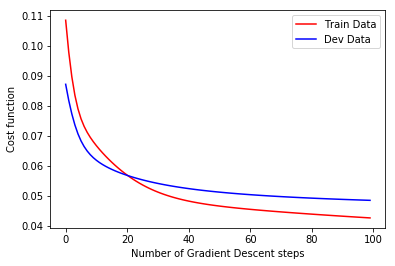

In [148]:
np.random.seed(0)
## (1) Parameters
# Get number of features
num_features1 = accent_more.shape[1]
# Then get the number of keypoints from labels
num_labels1 = more_labels.shape[1]

numHiddenNodes_high = 600 
w9A_1 = theano.shared(np.asarray((np.random.randn(*(num_features1, numHiddenNodes_high))*.01)))
w9A_2 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes_high, num_labels1))*.01)))
params9A = [w9A_1, w9A_2]


## (2) Model
X9A = T.matrix()
Y9A = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Second, activation on both layers is tanh
def model9A(X9A, w9A_1, w9A_2):
    return T.tanh(T.dot(T.tanh(T.dot(X9A, w9A_1)), w9A_2))
y_hat9A = model9A(X9A, w9A_1, w9A_2)


## (3) Cost is RMSE
cost9A = T.sqrt(T.mean((Y9A - y_hat9A)**2))

## (4) Minimization.  Update rule changes to backpropagation.
alpha9A = 0.001
def backprop(cost, w):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        updates.append([w1, w1 - grad * alpha9A])
    return updates
update9A = backprop(cost9A, params9A)
train9A = theano.function(inputs=[X9A, Y9A], outputs=cost9A, updates=update9A, allow_input_downcast=True)
predict9A = theano.function(inputs=[X9A], outputs=y_hat9A, allow_input_downcast=True)

miniBatchSize = 10
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):
        for start, end in zip(range(0, len(accent_more), miniBatchSize), range(miniBatchSize, len(accent_more), miniBatchSize)):
            cost9A = train9A(accent_more[start:end], more_labels[start:end])
        cost_vec.append(cost9A)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict9A(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
        
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
gradientDescentStochastic(100)

### C3) Blur Data 
A 9 pixel Gaussian blur is used to smooth the training images. Gussian blurring changes the weight of a pixel's influence and is determined by a Guassian function over the distance to the relevant pixel.  
We are only using the original training data set, not the set including flipped images, in order to do comparisons later.

RMSE (1, 0.09979072946693616)
RMSE (2, 0.0956362709245306)
RMSE (3, 0.09218097231753344)
RMSE (4, 0.08895230855269926)
RMSE (5, 0.08596187290367097)
RMSE (6, 0.08322682147918833)
RMSE (7, 0.08075141959835257)
RMSE (8, 0.07852829227275214)
RMSE (9, 0.07654229223912)
RMSE (10, 0.07477386230717811)
RMSE (11, 0.07320155447388112)
RMSE (12, 0.07180378043176418)
RMSE (13, 0.0705599156018175)
RMSE (14, 0.06945091267238553)
RMSE (15, 0.06845957720986981)
RMSE (16, 0.06757062758624319)
RMSE (17, 0.06677062717953673)
RMSE (18, 0.06604784834062806)
RMSE (19, 0.0653921063291582)
RMSE (20, 0.06479458633810008)
RMSE (21, 0.06424767657668479)
RMSE (22, 0.0637448139272603)
RMSE (23, 0.06328034482804905)
RMSE (24, 0.06284940186602135)
RMSE (25, 0.06244779543647367)
RMSE (26, 0.062071919298839644)
RMSE (27, 0.061718668659455946)
RMSE (28, 0.061385369384148736)
RMSE (29, 0.061069717000887404)
RMSE (30, 0.06076972425049816)
RMSE (31, 0.06048367605826678)
RMSE (32, 0.06021009091876498)
RMSE (33, 0.05994768

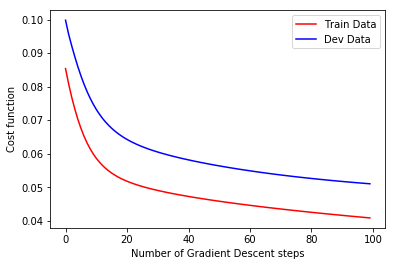

In [147]:
np.random.seed(0)
## (1) Parameters
# Get number of features
num_features1 = blurred.shape[1]
# Then get the number of keypoints from labels
num_labels1 = train_y.shape[1]

numHiddenNodes_high = 600 
w10_1 = theano.shared(np.asarray((np.random.randn(*(num_features1, numHiddenNodes_high))*.01)))
w10_2 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes_high, num_labels1))*.01)))
params10 = [w10_1, w10_2]


## (2) Model
X10 = T.matrix()
Y10 = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Second, activation on both layers is tanh
def model10(X10, w10_1, w10_2):
    return T.tanh(T.dot(T.tanh(T.dot(X10, w10_1)), w10_2))
y_hat10 = model10(X10, w10_1, w10_2)


## (3) Cost is RMSE
cost10 = T.sqrt(T.mean((Y10 - y_hat10)**2))

## (4) Minimization.  Update rule changes to backpropagation.
alpha10 = 0.001
def backprop(cost, w):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        updates.append([w1, w1 - grad * alpha10])
    return updates
update10 = backprop(cost10, params10)
train10 = theano.function(inputs=[X10, Y10], outputs=cost10, updates=update10, allow_input_downcast=True)
predict10 = theano.function(inputs=[X10], outputs=y_hat10, allow_input_downcast=True)

miniBatchSize = 10
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):
        for start, end in zip(range(0, len(blurred), miniBatchSize), range(miniBatchSize, len(blurred), miniBatchSize)):
            cost10 = train10(blurred[start:end], train_y[start:end])
        cost_vec.append(cost10)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict10(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
        
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
gradientDescentStochastic(100)

### C3-1) Blur Data with Flipped Images
Increase training set size by including flipped images and also blurring.

RMSE (1, 0.0946969779219459)
RMSE (2, 0.08845222555511749)
RMSE (3, 0.08309133009535286)
RMSE (4, 0.0786774508127012)
RMSE (5, 0.0751364768795193)
RMSE (6, 0.07232191545022226)
RMSE (7, 0.07007981516249923)
RMSE (8, 0.06827680734042389)
RMSE (9, 0.06680689308317878)
RMSE (10, 0.06558917502385034)
RMSE (11, 0.06456301046545002)
RMSE (12, 0.06368322885333742)
RMSE (13, 0.0629162080125686)
RMSE (14, 0.06223687238822047)
RMSE (15, 0.061626459688122144)
RMSE (16, 0.06107087678950889)
RMSE (17, 0.060559493192022334)
RMSE (18, 0.0600842549145203)
RMSE (19, 0.05963903183167876)
RMSE (20, 0.05921913502682493)
RMSE (21, 0.05882095831996011)
RMSE (22, 0.05844171089544813)
RMSE (23, 0.05807921711224846)
RMSE (24, 0.057731766129428964)
RMSE (25, 0.057397998668954196)
RMSE (26, 0.057076821604163934)
RMSE (27, 0.05676734348727598)
RMSE (28, 0.056468825883452665)
RMSE (29, 0.05618064665661912)
RMSE (30, 0.05590227229313917)
RMSE (31, 0.05563323705275673)
RMSE (32, 0.05537312726961587)
RMSE (33, 0.0551

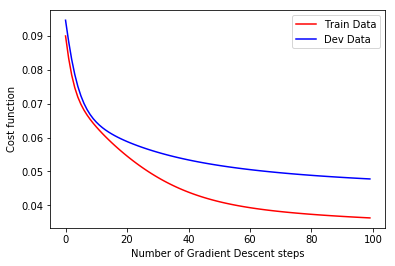

In [149]:
np.random.seed(0)
## (1) Parameters
# Get number of features
num_features1 = blur_more.shape[1]
# Then get the number of keypoints from labels
num_labels1 = more_labels.shape[1]

numHiddenNodes_high = 600 
w10A_1 = theano.shared(np.asarray((np.random.randn(*(num_features1, numHiddenNodes_high))*.01)))
w10A_2 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes_high, num_labels1))*.01)))
params10A = [w10A_1, w10A_2]


## (2) Model
X10A = T.matrix()
Y10A = T.matrix()
# Two notes:
# First, feed forward is the composition of layers (dot product + activation function)
# Second, activation on both layers is tanh
def model10A(X10A, w10A_1, w10A_2):
    return T.tanh(T.dot(T.tanh(T.dot(X10A, w10A_1)), w10A_2))
y_hat10A = model10A(X10A, w10A_1, w10A_2)


## (3) Cost is RMSE
cost10A = T.sqrt(T.mean((Y10A - y_hat10A)**2))

## (4) Minimization.  Update rule changes to backpropagation.
alpha10A = 0.001
def backprop(cost, w):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        updates.append([w1, w1 - grad * alpha10A])
    return updates
update10A = backprop(cost10A, params10A)
train10A = theano.function(inputs=[X10A, Y10A], outputs=cost10A, updates=update10A, allow_input_downcast=True)
predict10A = theano.function(inputs=[X10A], outputs=y_hat10A, allow_input_downcast=True)

miniBatchSize = 10
def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    cost_vec = []
    cost_vec1 = []
    start_time = time.time()
    for i in range(epochs):
        for start, end in zip(range(0, len(blur_more), miniBatchSize), range(miniBatchSize, len(blur_more), miniBatchSize)):
            cost10A = train10A(blur_more[start:end], more_labels[start:end])
        cost_vec.append(cost10A)
        trainTime =  trainTime + (time.time() - start_time)
        RMSE = np.sqrt(mean_squared_error(dev_y, predict10A(dev_X), multioutput='uniform_average'))
        cost_vec1.append(RMSE)
        print('RMSE', (i+1, RMSE))    
    print('train time = ', trainTime)
        
    plt.plot(cost_vec, c='red', label='Train Data')
    plt.plot(cost_vec1, c='blue', label = 'Dev Data')
    plt.xlabel('Number of Gradient Descent steps')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
gradientDescentStochastic(100)


### Part C Conclusion: Multi-Layer Neural Network with Improved Training Data
The optimal model is trained using blurred data which is extended by flipping the original data set

Parameters and Model set up:
*   Model:Multi-Layer Neural Network 
    * Tanh Activation Function for both hidden and output layer
    * 600 hidden nodes
    * 1 hidden layer
*   Cost Function: RMSE (root mean square error)
*   Objective: RMSE Minimization with Gradient Descent Method
*   Gradient Descent Method: Mini-Batch Gradient Descent Method
    * Learning Rate: 0.001
    * Batch Size: 10
    * Epochs: 100 (trade off between computation time and accuracy)
    
The performance of the model:
*  The average RMSE for all keypoints is 0.048 for Dev data
*  RMSE for each keypoint pair is improved with larger size of blurred and flipped training data
*  Based on histogram of RMSE for all Dev data, the center of the histogram of RMSE of prediction for the flipped and blurred data is 0.03.
*  The image with highest and lowest RMSE are shown below. It is obvious that when the picture is not centered or picture shows people with sunglasses, the model performance will decrease. 


In [151]:
 pd.DataFrame(np.sqrt(mean_squared_error(dev_y, predict10A(dev_X), multioutput='raw_values')),columns=['RMSE'], index=dev_labels).sort_values('RMSE', ascending=False)

,RMSE
mouth_center_bottom_lip_y,0.079450
nose_tip_y,0.067452
mouth_center_top_lip_y,0.067449
mouth_left_corner_y,0.062808
mouth_right_corner_y,0.061450
right_eyebrow_outer_end_y,0.055943
right_eyebrow_outer_end_x,0.055240
left_eyebrow_outer_end_y,0.054074
left_eyebrow_outer_end_x,0.051953
mouth_left_corner_x,0.051500


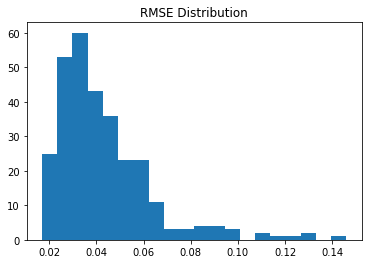

In [153]:
## RMSE by sample
RMSE_1 = []
dev_y_pred10A = predict10A(dev_X)
for i in range(len(dev_y)):
    RMSE_ = (score(dev_y[i], dev_y_pred10A[i]))
    RMSE_1.append([i, RMSE_]) # list of lists of form [index, rmse]
RMSE_1.sort(key=lambda x: x[1])
#print(RMSE_1[0:5])
plt.hist([n[1] for n in RMSE_1], bins='auto')
plt.title('RMSE Distribution')
plt.show()

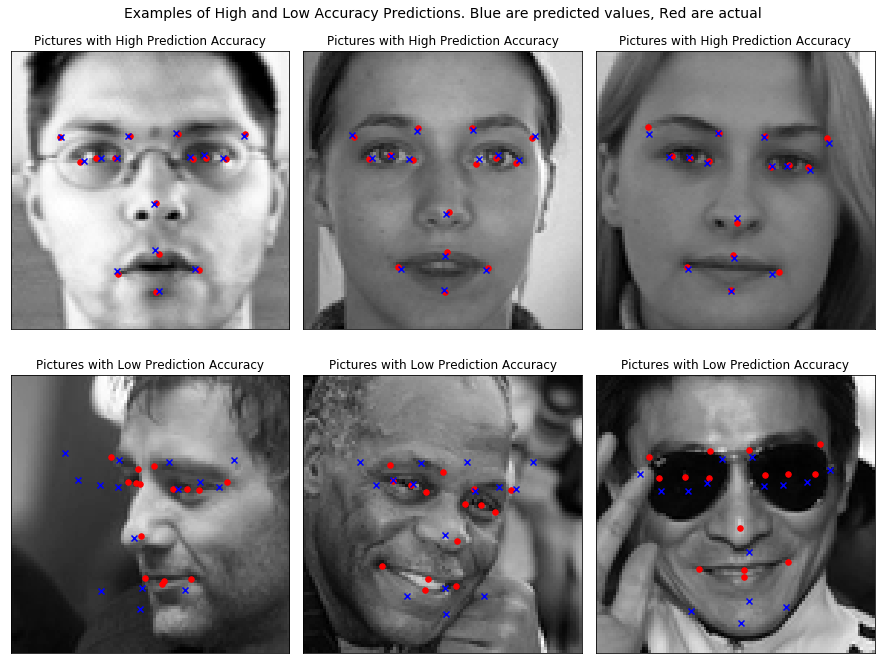

In [155]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=-0.4, wspace=0.05)

fig.suptitle("Examples of High and Low Accuracy Predictions. Blue are predicted values, Red are actual",y=0.9, fontsize=14)

for n in range(1, 4):
    ax = fig.add_subplot(2, 3, n, xticks=[], yticks=[])
    #print(RMSE_1[n-1][0], RMSE_1[n-1][1])
    plot_example(dev_X[RMSE_1[n-1][0]], dev_y[RMSE_1[n-1][0]], ax, dev_y_pred10A[RMSE_1[n-1][0]])
    plt.title('Pictures with High Prediction Accuracy')
for n in range(1, 4):
    ax1 = fig.add_subplot(2, 3, n+3, xticks=[], yticks=[])
    #print(RMSE_1[n*-1][0], RMSE_1[n*-1][1])
    plot_example(dev_X[RMSE_1[n*-1][0]], dev_y[RMSE_1[n*-1][0]], ax1, dev_y_pred10A[RMSE_1[n*-1][0]])
    plt.title('Pictures with Low Prediction Accuracy')

plt.show()

# VI. Conclusions  

Summarizing the results calculated above we get the following table of RMSE:

|                         | Complete Labels | Accentuate Images | Blur Images | Add Flipped Images |
|-------------------------|-----------------|-------------------|-------------|--------------------|
| kNN                     | 0.052           | 0.056             | 0.052       | 0.052              |
| Linear Regression       | 0.057           | 0.051             | 0.064       | 0.067              |
| Single-Layer Neural Net | 0.082           |                   |             |                    |
| Multi-Layer NN          | 0.050           | 0.050             | 0.051       | 0.048              |


These results indicate that more fully labeled training data is key to improving the model. Certain techniques of feature engineering like blurring and accenting can help, but are not significant contributors to improved prediction accuracy. 


Further work that will be required to improve the model also includes:  

1) Feature engineering to improve prediction for images that are hard to predict such as:
  * people turned to one side
  * images with people wearing sunglasses
  * images with low resolution
  * images with poor centering of the face
  
2) Multi-layer neural nets are better than linear regression and kNN in general, and can be further improved by using a more sophisticated version, such as a  Convolutional Neural Net (cNN). Unfortunately, we could not get the code for the cNN to work, so we have placed it in the Appendix. Other Kaggle competitors were able to significantly reduce the RMSE below 0.048 using a cNN.  

3) Improvement of running speed - dealing with only 2000-4000 images and 100 epochs on a 2 layer model can still take significant time to converge. Optimization of speed and ability to run on a GPU would be essential to further improvement.

# Appendix: Convolutional Neural Net (CNN or ConvoNet) - Incomplete

*Convolutional NN*

- This is likely the prize - developed for image processing
- Need to reprocess data - uses 2D images (not 1D)
- Possibly do a generative model to create images and further train the network (e.g. by mirroring the faces - so making 2 faces out of one)
-----------
* need to work on predict function... not working (may have to discard if bug not fixed)  
* cost function also should be different from Week 7 tutorial.  
* RMSE seems like the right metric to use.   

In [0]:
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
from theano.tensor.nnet import conv2d
from theano.tensor.signal.pool import pool_2d

## (1) Parameters
numHiddenNodes = 600 
patchWidth = 3
patchHeight = 3
featureMapsLayer1 = 32

# For convonets, we will work in 2d rather than 1d.  The images are 96x96 in 2d.
imageWidth = 96


# Convolution layers.  
w_1 = theano.shared(np.asarray((np.random.randn(*(featureMapsLayer1, 1, patchWidth, patchHeight))*.01)))

# Fully connected NN. 
w_4 = theano.shared(np.asarray((np.random.randn(*(featureMapsLayer1 * 49 * 49, numHiddenNodes))*.01)))
w_5 = theano.shared(np.asarray((np.random.randn(*(numHiddenNodes, numClasses))*.01)))
params = [w_1, w_4, w_5]

## (2) Model
theano.config.floatX = 'float64'
X = T.tensor4() # conv2d works with tensor4 type
Y = T.matrix()

srng = RandomStreams()

def dropout(X, p=0.):
    if p > 0:
        X *= srng.binomial(X.shape, p=1 - p)
        X /= 1 - p
    return X

# Theano provides built-in support for add convolutional layers
def model(X, w_1, w_4, w_5, p_1, p_2):
    l1 = dropout(T.flatten(pool_2d(T.maximum(conv2d(X, w_1, border_mode='full'),0.), (2, 2)), ndim=2), p_1) #flatten to switch back to 1d layers
    l4 = dropout(T.maximum(T.dot(l1, w_4), 0.), p_2)
    return T.dot(l4, w_5) 

y_hat_train = model(X, w_1, w_4, w_5, 0.2, 0.5)
y_hat_predict = model(X, w_1, w_4, w_5, 0., 0.)

## (3) Cost
cost = T.sum(T.sqr(Y - y_hat_train))
               
## (4) Minimization.  
def backprop(cost, w, alpha=0.0001, rho=0.9, epsilon=1e-6):
    grads = T.grad(cost=cost, wrt=w)
    updates = []
    for w1, grad in zip(w, grads):
        
        # adding gradient scaling
        acc = theano.shared(w1.get_value() * 0.0)
        acc_new = rho * acc + (1 - rho) * grad ** 2
        gradient_scaling = T.sqrt(acc_new + epsilon)
        grad = grad / gradient_scaling
        updates.append((acc, acc_new))
        
        updates.append((w1, w1 - grad * alpha))
    return updates

update = backprop(cost, params)
train = theano.function(inputs=[X, Y], outputs=cost, updates=update, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=y_hat_predict, allow_input_downcast=True)


miniBatchSize = 1

def gradientDescentStochastic(epochs):
    trainTime = 0.0
    predictTime = 0.0
    start_time = time.time()
    
    for i in range(epochs):
        for start, end in zip(range(0, len(train_X), miniBatchSize), range(miniBatchSize, len(train_X), miniBatchSize)):
            cost = train(train_X[start:end], train_y[start:end])
       
        trainTime =  trainTime + (time.time() - start_time)
        print('RMSE', (i+1, np.sqrt(mean_squared_error(dev_y, predict(dev_X), multioutput='uniform_average'))))
        print('train time = %.2f' %(trainTime))


gradientDescentStochastic(10)

start_time = time.time().
print('predict time = %.2f' %(time.time() - start_time))
